In [764]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding and Exploration

In [765]:
#loda the data 
housing=pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [766]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [767]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [768]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [769]:
housing.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [770]:
housing.shape

(1460, 81)

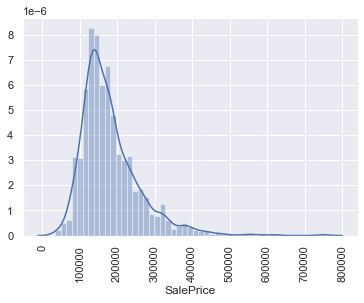

In [771]:
# lets introspect the distribution of the Target col

sns.distplot(housing['SalePrice'])
plt.xticks(rotation=90);

In [772]:
housing.SalePrice.skew()

1.8828757597682129

In [773]:
housing.SalePrice.kurt()

6.536281860064529

In [774]:
# Inspect the missing values
housing.isna().sum().sort_values(ascending=False).head(50)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

Please take note that all the NA values have meaning except for LotFrontage.

So we need to replace these NA values with appropriate values so that these are not treated as missing values.

In [775]:
NA_as_None=['Alley','Fence','FireplaceQu']
NA_as_No_Garage=['GarageCond','GarageType','GarageFinish','GarageQual']
NA_as_No_Basement=['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']

In [776]:
# Lets replace NA which is a meaningful info by None

for i in NA_as_None:
    housing[i].fillna("None", inplace=True)

In [777]:
# Lets replace NA which is a meaningful info by No_Garage

for i in NA_as_No_Garage:
    housing[i].fillna("No_Garage", inplace=True)

In [778]:
# Lets replace NA which is a meaningful info by No_Basement

for i in NA_as_No_Basement:
    housing[i].fillna("No_Basement", inplace=True)

In [779]:
round((housing.isna().sum()/len(housing)*100),2).sort_values(ascending=False).head(10)

PoolQC         99.52
MiscFeature    96.30
LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
ExterCond       0.00
RoofStyle       0.00
RoofMatl        0.00
dtype: float64

We can drop Columns 'PoolQC' and 'MiscFeature' as it has more then 96% same value.

We can drop 'GarageYrBlt' as it is not much useful in analysis.

In [780]:
housing.drop(['PoolQC','MiscFeature','GarageYrBlt'],axis=1,inplace=True)

In [781]:
round((housing.isna().sum()/len(housing)*100),2).sort_values(ascending=False).head(10)

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
SalePrice       0.00
ExterCond       0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
dtype: float64

* All the NA values with meanings are been replaced with appropriate values

In [782]:
housing.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [783]:
# Store all the numeric columns separately for numeric analysis
numcol=housing.describe().columns

In [784]:
len(housing.Id.unique())

1460

Number of unique IDs in dataset are equal to length of dataset.
* This implies there are no dupplicate entries in our Data.

### Data Visualization

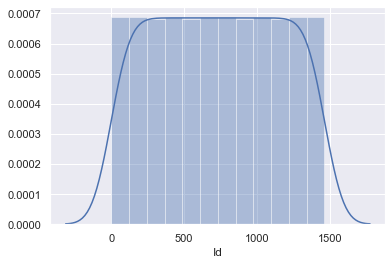

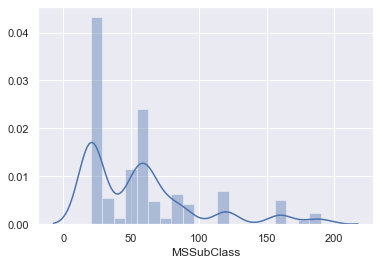

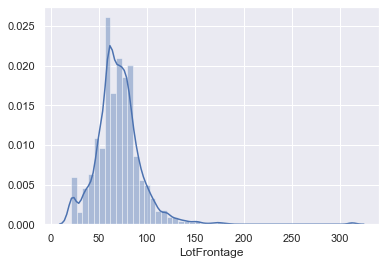

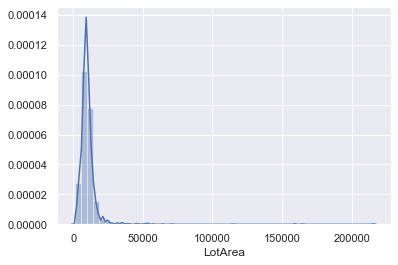

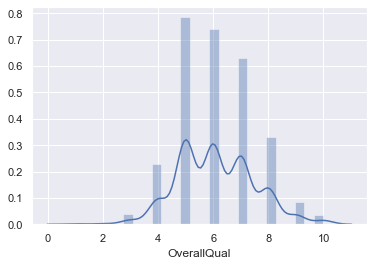

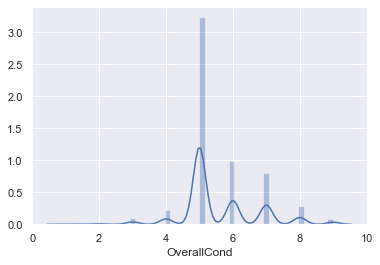

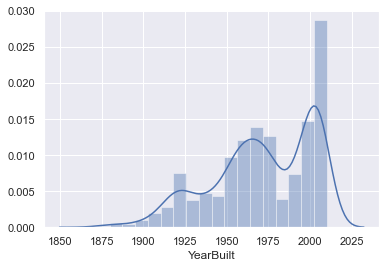

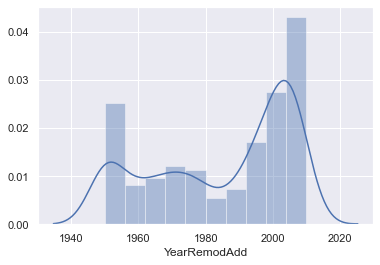

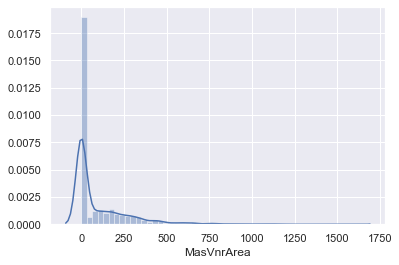

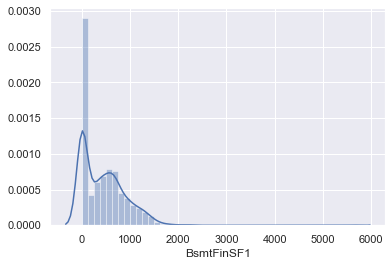

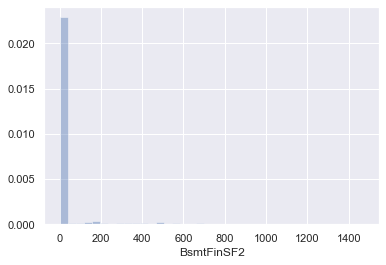

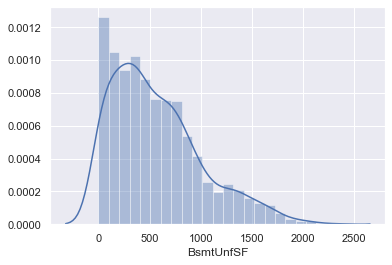

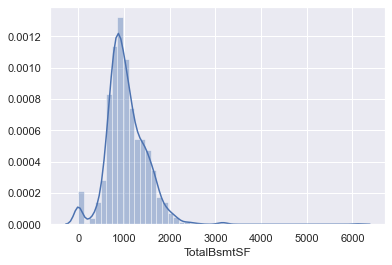

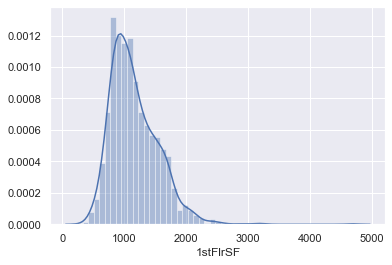

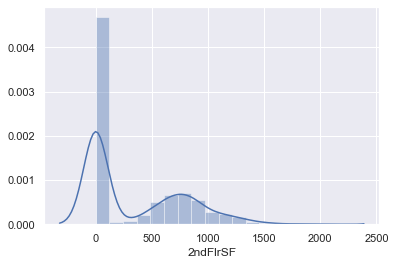

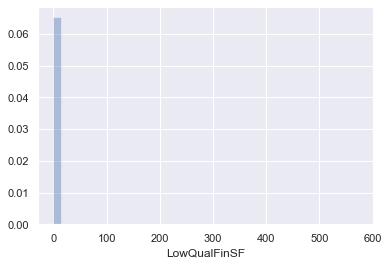

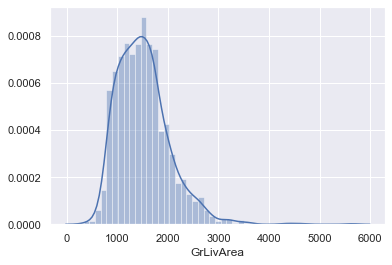

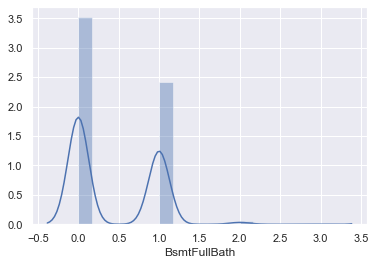

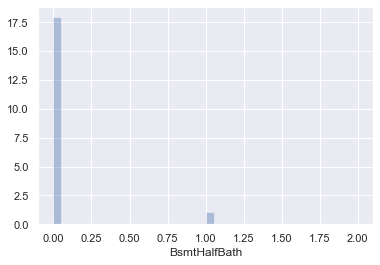

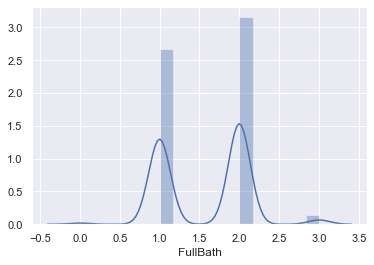

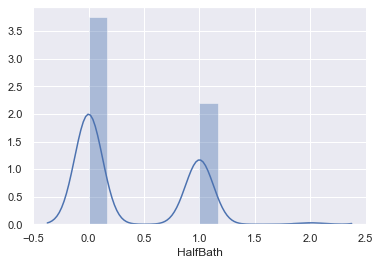

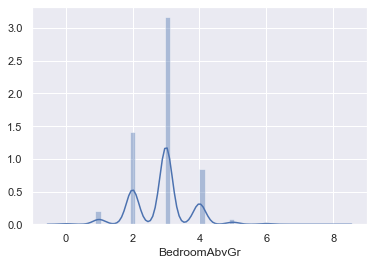

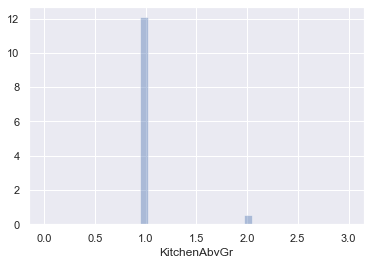

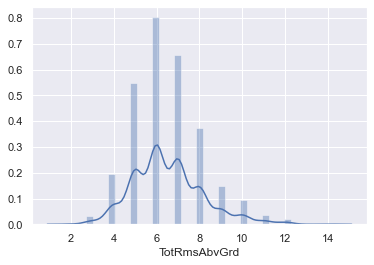

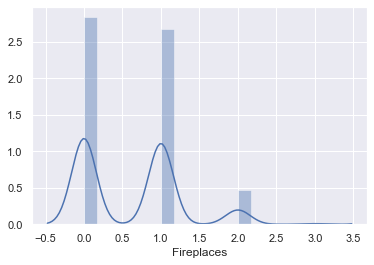

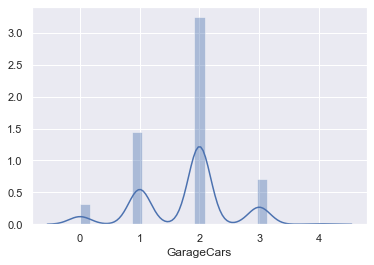

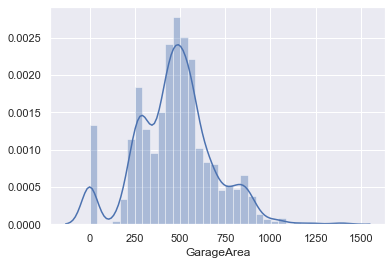

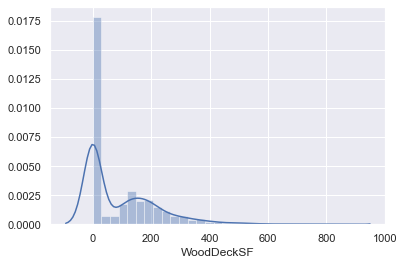

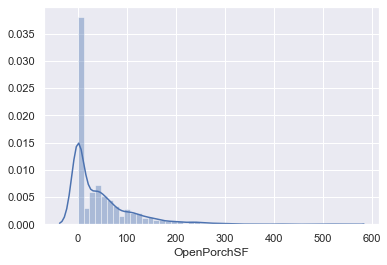

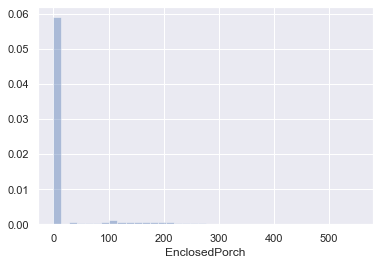

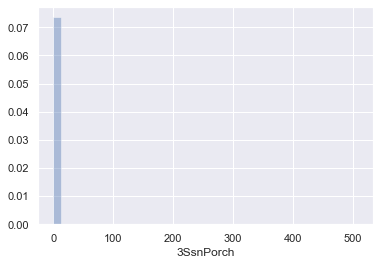

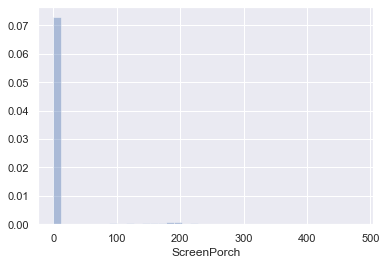

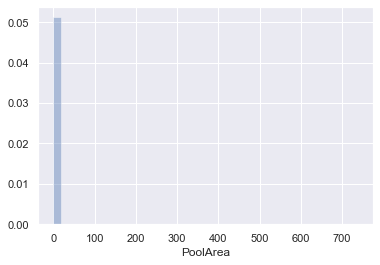

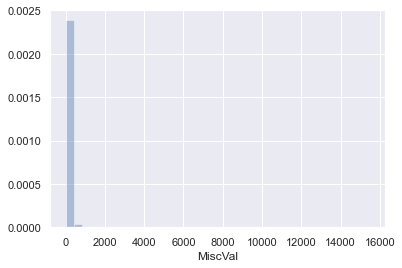

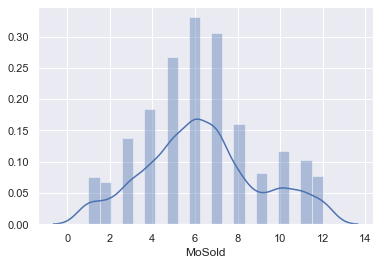

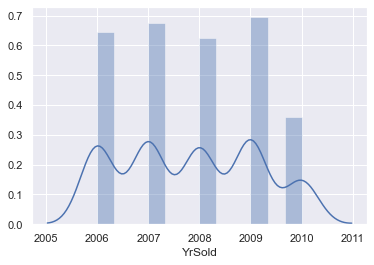

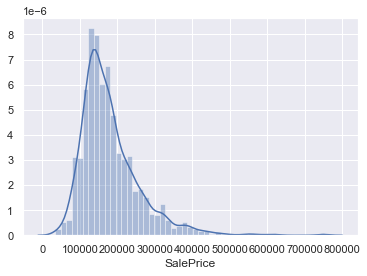

In [785]:
for i in numcol:
    sns.distplot(housing[i])
    plt.show()

From above plots we can notice that most of the variables are multi nodal or Positively Skewed.
* Most of houses have garage capacity of 2 cars.
* Most of houses have TotRmsAbvGrd ranging from 5-8.
* Most of Houses have 1 kitchenAbvGr.


Scatter Plot for SalePrice vs Id


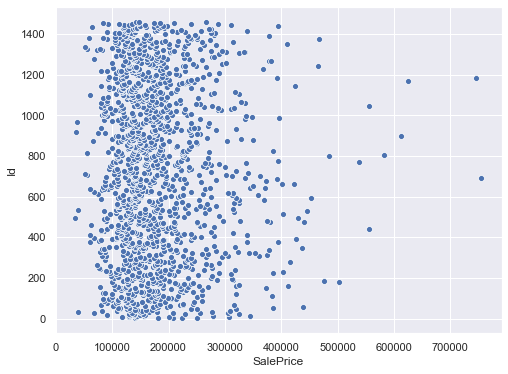

Scatter Plot for SalePrice vs MSSubClass


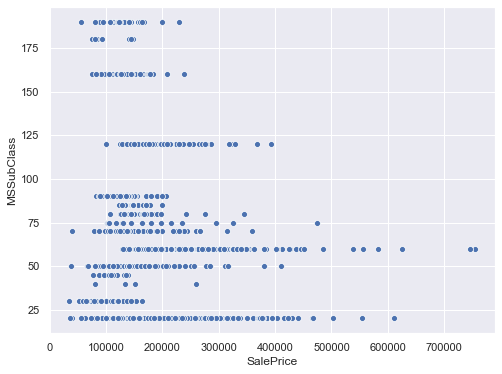

Scatter Plot for SalePrice vs LotFrontage


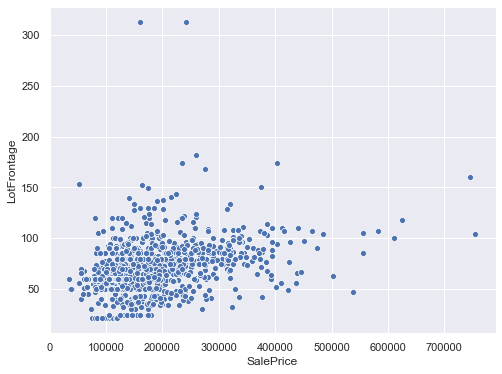

Scatter Plot for SalePrice vs LotArea


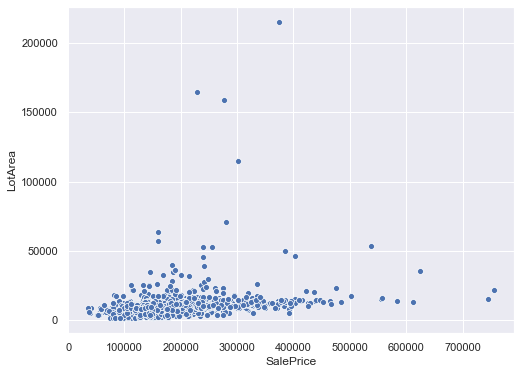

Scatter Plot for SalePrice vs OverallQual


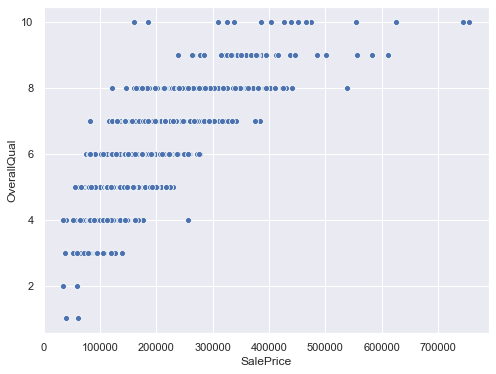

Scatter Plot for SalePrice vs OverallCond


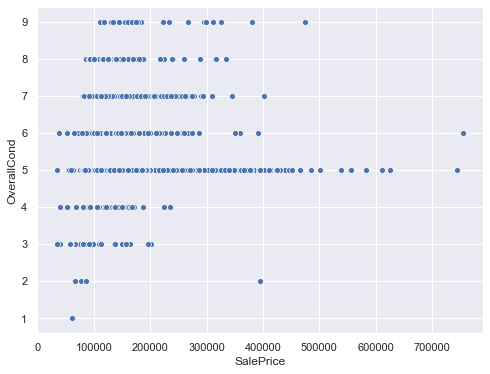

Scatter Plot for SalePrice vs YearBuilt


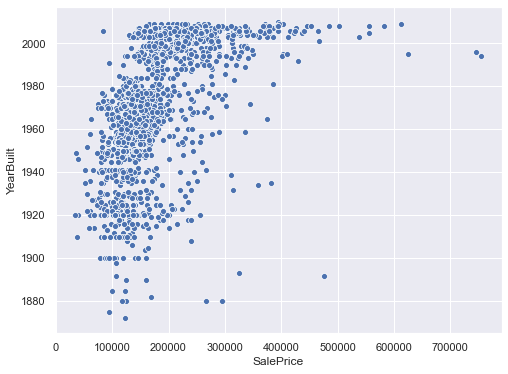

Scatter Plot for SalePrice vs YearRemodAdd


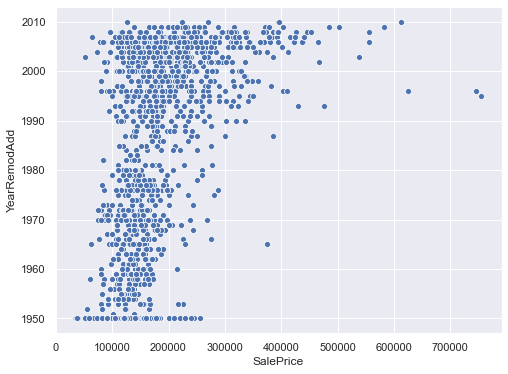

Scatter Plot for SalePrice vs MasVnrArea


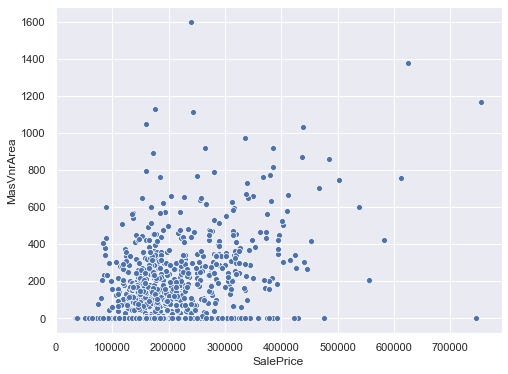

Scatter Plot for SalePrice vs BsmtFinSF1


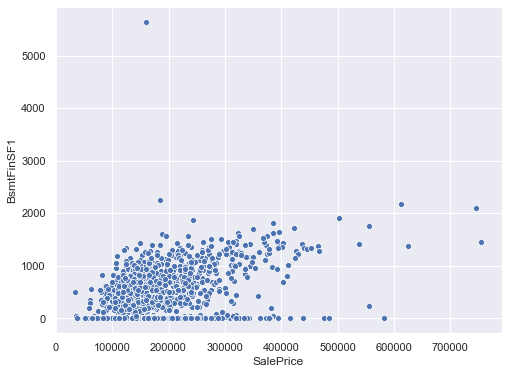

Scatter Plot for SalePrice vs BsmtFinSF2


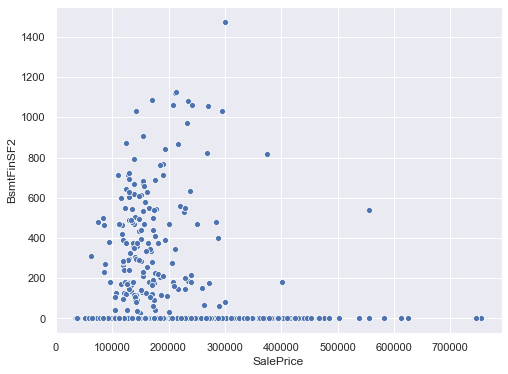

Scatter Plot for SalePrice vs BsmtUnfSF


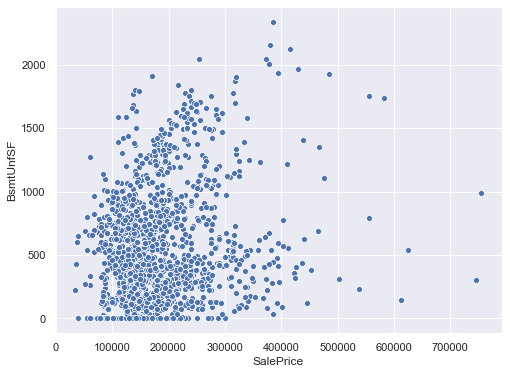

Scatter Plot for SalePrice vs TotalBsmtSF


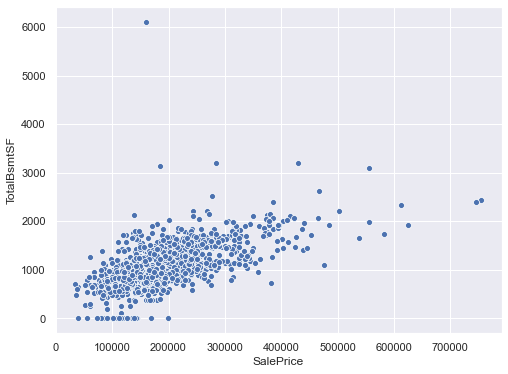

Scatter Plot for SalePrice vs 1stFlrSF


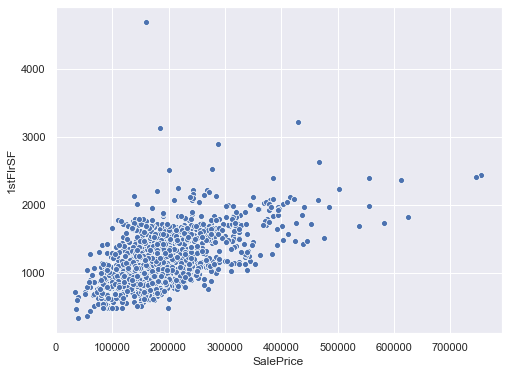

Scatter Plot for SalePrice vs 2ndFlrSF


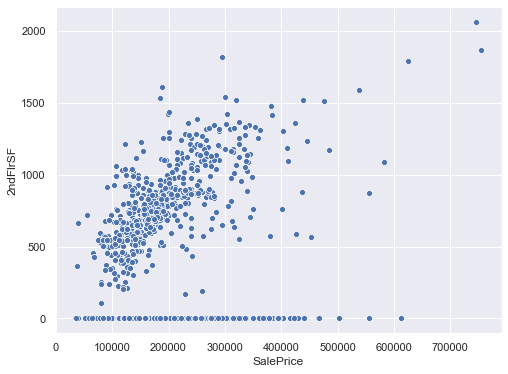

Scatter Plot for SalePrice vs LowQualFinSF


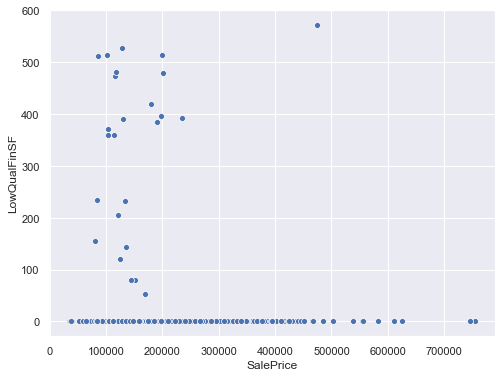

Scatter Plot for SalePrice vs GrLivArea


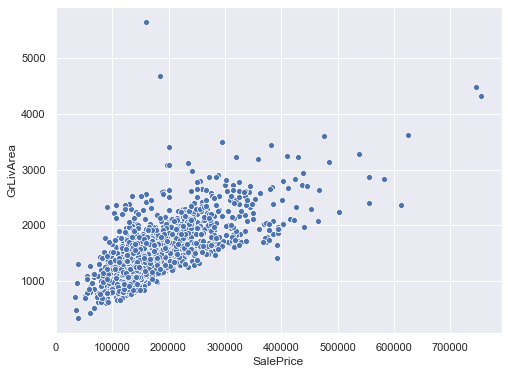

Scatter Plot for SalePrice vs BsmtFullBath


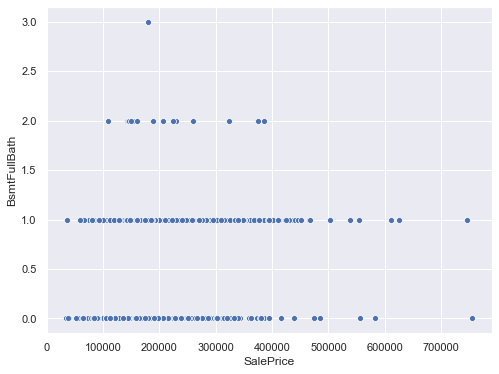

Scatter Plot for SalePrice vs BsmtHalfBath


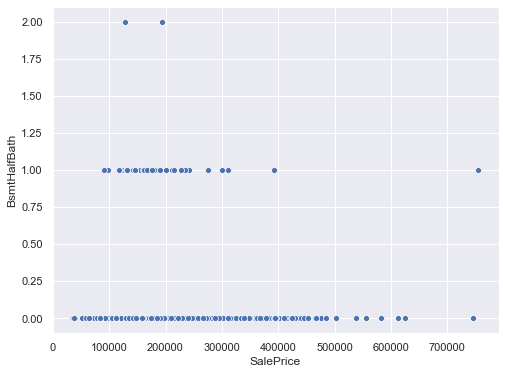

Scatter Plot for SalePrice vs FullBath


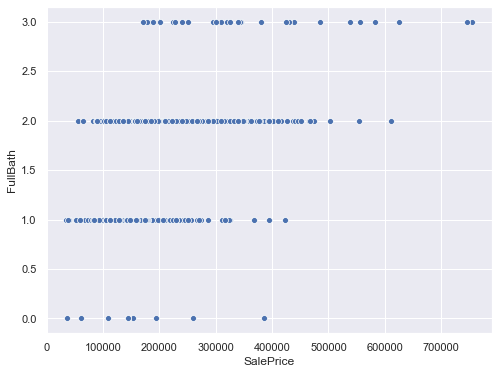

Scatter Plot for SalePrice vs HalfBath


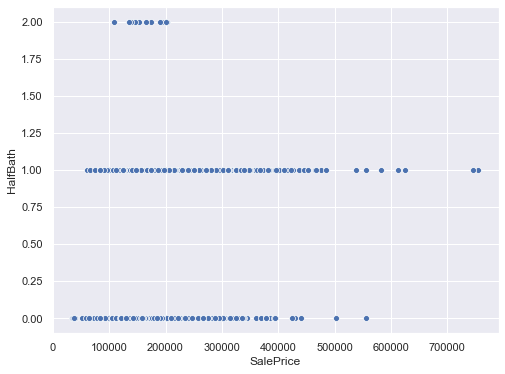

Scatter Plot for SalePrice vs BedroomAbvGr


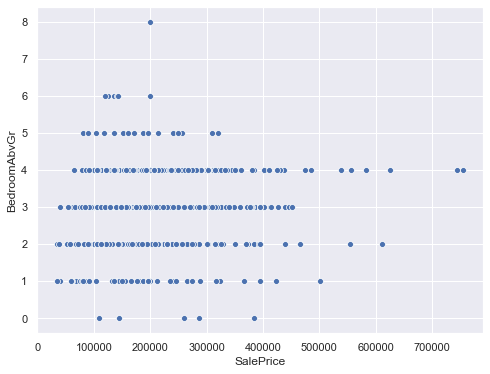

Scatter Plot for SalePrice vs KitchenAbvGr


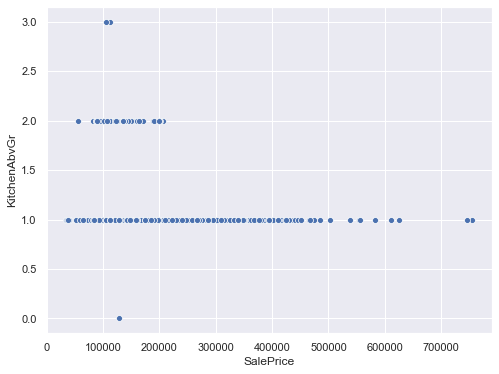

Scatter Plot for SalePrice vs TotRmsAbvGrd


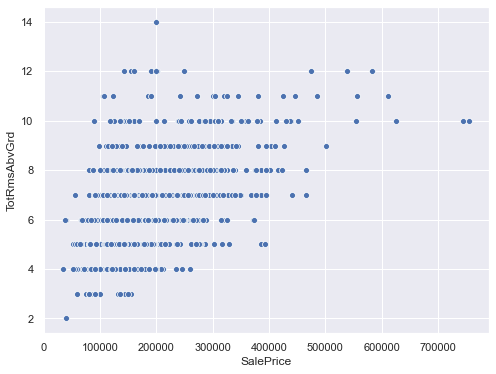

Scatter Plot for SalePrice vs Fireplaces


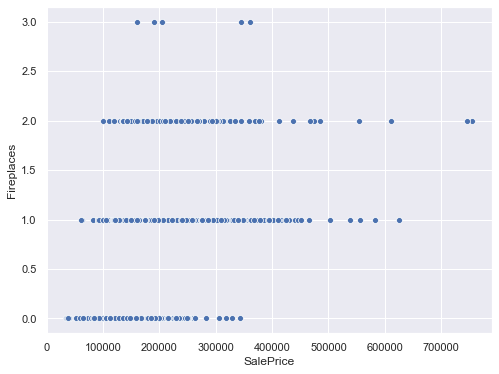

Scatter Plot for SalePrice vs GarageCars


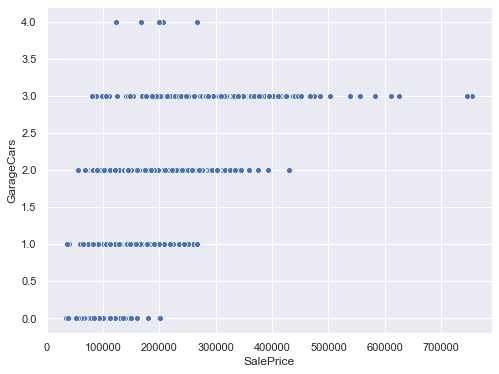

Scatter Plot for SalePrice vs GarageArea


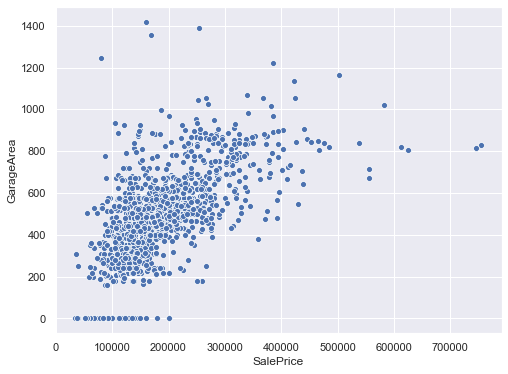

Scatter Plot for SalePrice vs WoodDeckSF


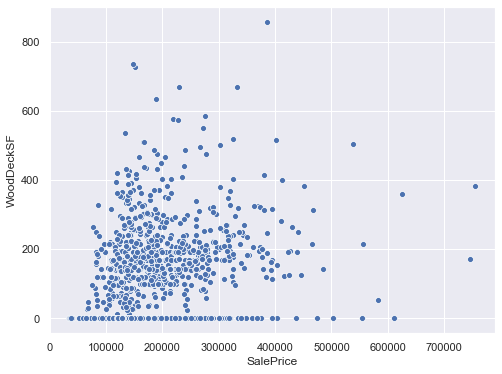

Scatter Plot for SalePrice vs OpenPorchSF


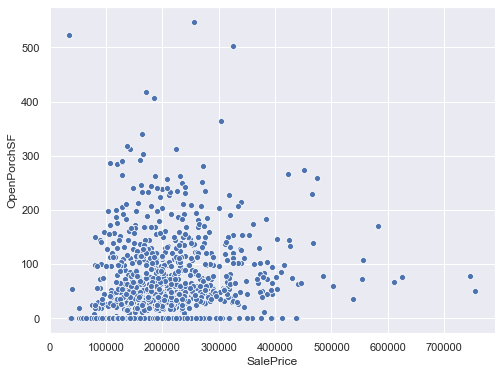

Scatter Plot for SalePrice vs EnclosedPorch


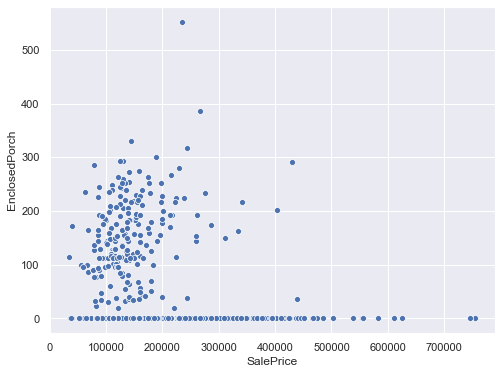

Scatter Plot for SalePrice vs 3SsnPorch


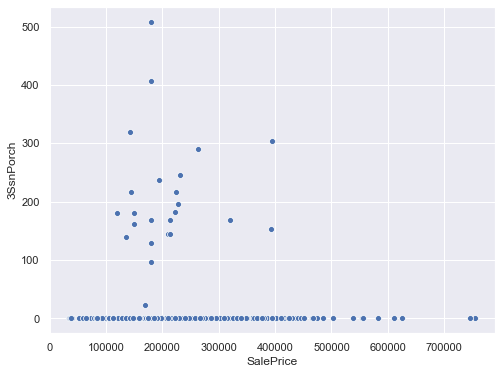

Scatter Plot for SalePrice vs ScreenPorch


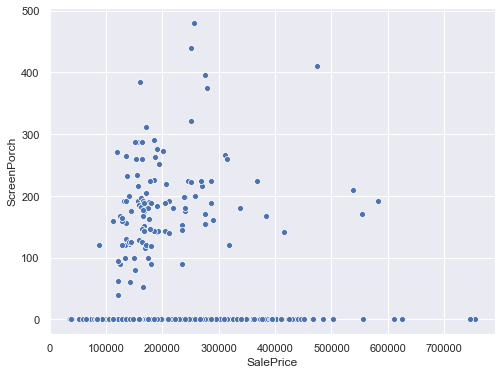

Scatter Plot for SalePrice vs PoolArea


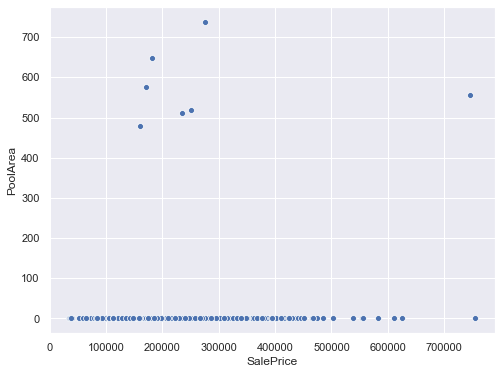

Scatter Plot for SalePrice vs MiscVal


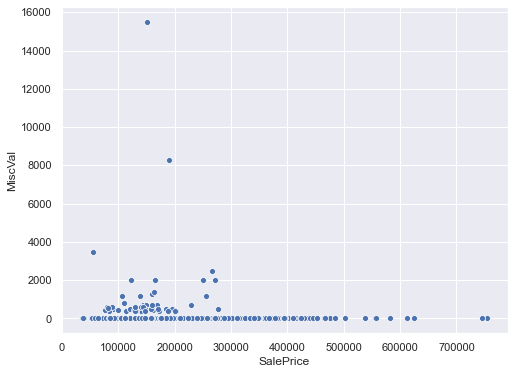

Scatter Plot for SalePrice vs MoSold


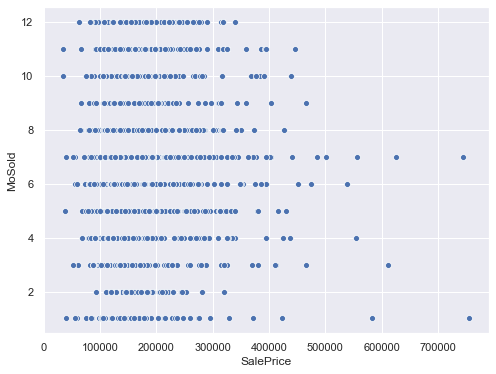

Scatter Plot for SalePrice vs YrSold


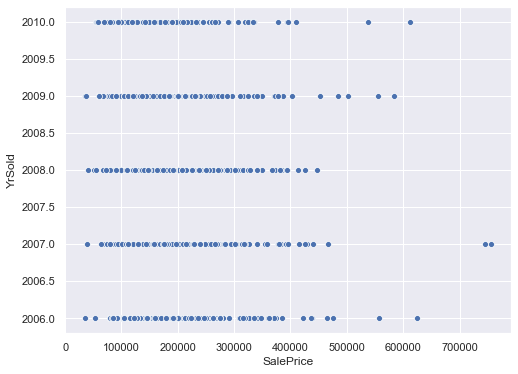

Scatter Plot for SalePrice vs SalePrice


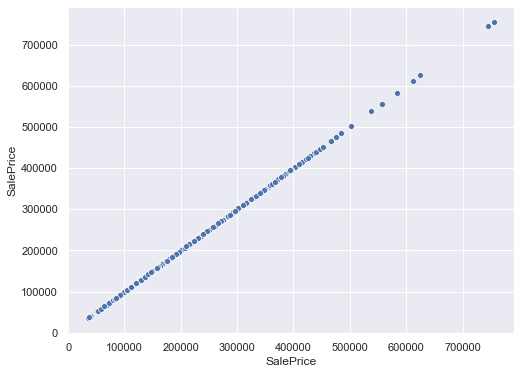

In [786]:
#Look for any trends in scatter plots of all numeric variables against SalePrice
for i in numcol:
    plt.figure(figsize=[8,6])
    sns.scatterplot(x=housing.SalePrice,y=housing[i])
    print('Scatter Plot for SalePrice vs '+i)
    plt.show()

* SalePrice tends to increase as the OverallQual increases.
* Incase of OverallCond, value belo 5 tends to give less Price.
* YearBuilt Have positive impact on SalePrice
* TotalBsmtSF and SalePrice shows positive linear relation between them.

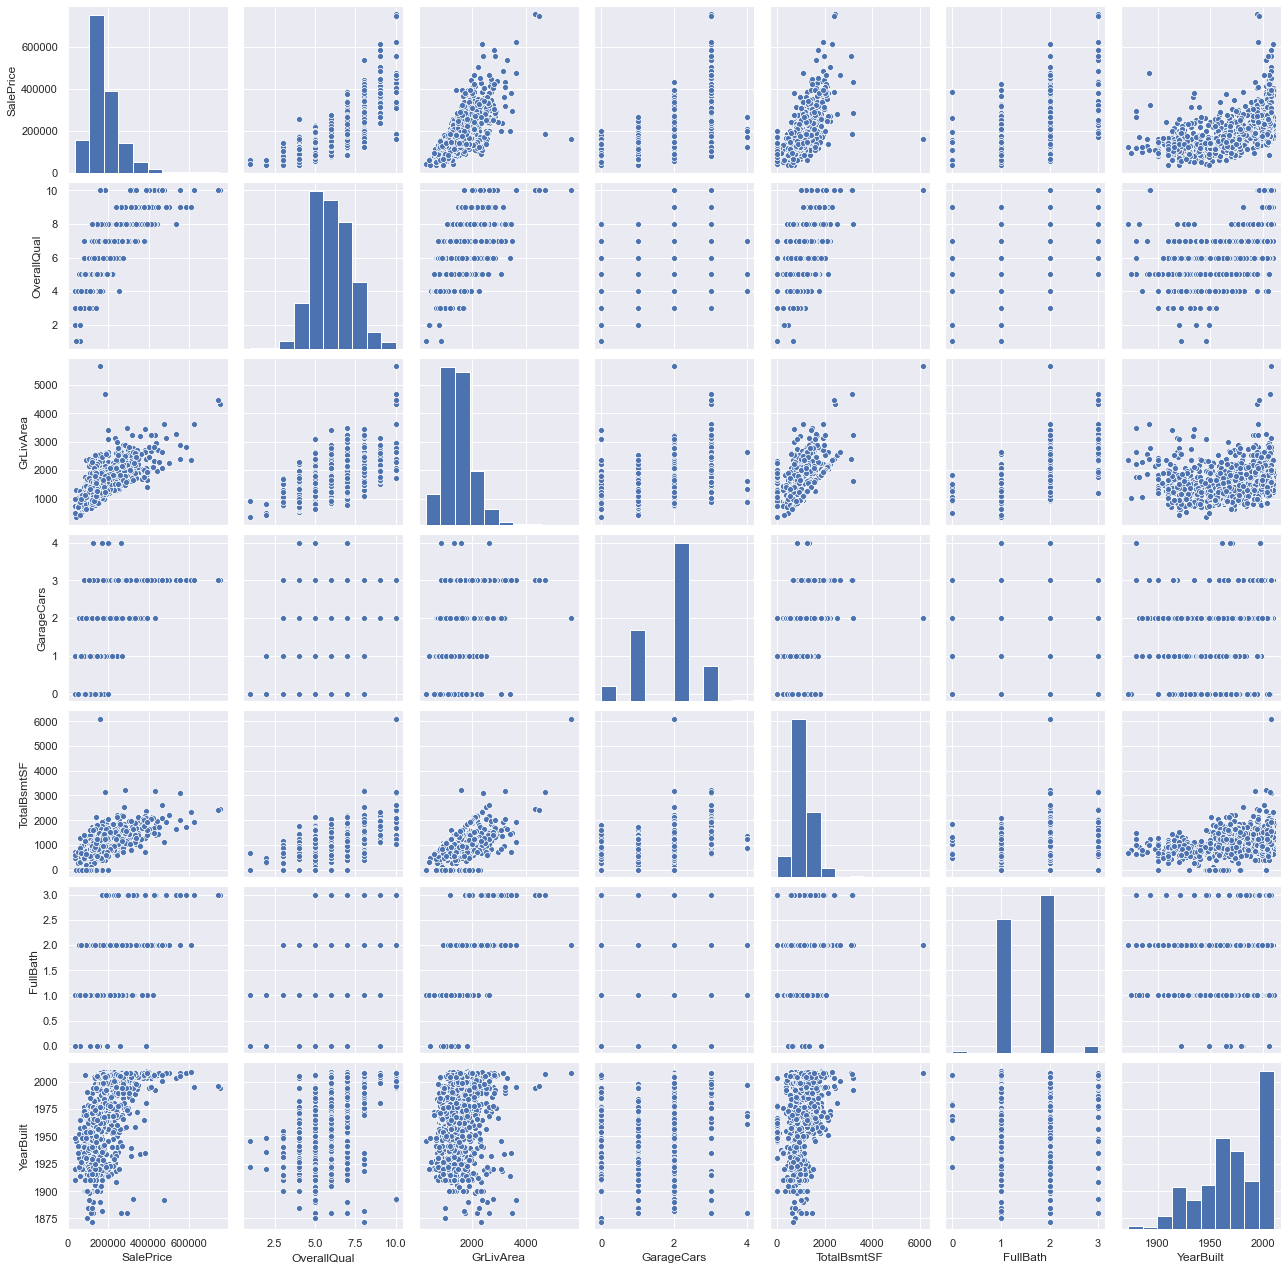

In [787]:
#lets look relations between few of the numerical columns

sns.set()
cols=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols],size=2.5)
plt.show();

In [788]:
numcol

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

   Here, although the variables MSSubClass is numeric (int), we'd rather treat it as categorical since it is numeric coding for different categories. Also, we do not want 'ID'. 

In [789]:
housing_numeric=housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.drop(['MSSubClass','Id'],axis=1,inplace=True)

In [790]:
# correlation matrix
cor = housing_numeric.corr().abs()
cor

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.426095     0.251646     0.059213   0.123349   
LotArea           0.426095  1.000000     0.105806     0.005636   0.014228   
OverallQual       0.251646  0.105806     1.000000     0.091932   0.572323   
OverallCond       0.059213  0.005636     0.091932     1.000000   0.375983   
YearBuilt         0.123349  0.014228     0.572323     0.375983   1.000000   
YearRemodAdd      0.088866  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.193458  0.104160     0.411876     0.128101   0.315707   
BsmtFinSF1        0.233633  0.214103     0.239666     0.046231   0.249503   
BsmtFinSF2        0.049900  0.111170     0.059119     0.040229   0.049107   
BsmtUnfSF         0.132644  0.002618     0.308159     0.136841   0.149040   
TotalBsmtSF       0.392075  0.260833     0.537808     0.171098   0.391452   
1stFlrSF          0.457181  0.299475     0.476224     0.144203   0.281986   
2ndFlrSF          0.080177  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.038469  0.004779     0.030429     0.025494   0.183784   
GrLivArea         0.402797  0.263116     0.593007     0.079686   0.199010   
BsmtFullBath      0.100949  0.158155     0.111098     0.054942   0.187599   
BsmtHalfBath      0.007234  0.048046     0.040150     0.117821   0.038162   
FullBath          0.198769  0.126031     0.550600     0.194149   0.468271   
HalfBath          0.053532  0.014259     0.273458     0.060769   0.242656   
BedroomAbvGr      0.263170  0.119690     0.101676     0.012980   0.070651   
KitchenAbvGr      0.006069  0.017784     0.183882     0.087001   0.174800   
TotRmsAbvGrd      0.352096  0.190015     0.427452     0.057583   0.095589   
Fireplaces        0.266639  0.271364     0.396765     0.023820   0.147716   
GarageCars        0.285691  0.154871     0.600671     0.185758   0.537850   
GarageArea        0.344997  0.180403     0.562022     0.151521   0.478954   
WoodDeckSF        0.088521  0.171698     0.238923     0.003334   0.224880   
OpenPorchSF       0.151972  0.084774     0.308819     0.032589   0.188686   
EnclosedPorch     0.010700  0.018340     0.113937     0.070356   0.387268   
3SsnPorch         0.070029  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.041383  0.043160     0.064886     0.054811   0.050364   
PoolArea          0.206167  0.077672     0.065166     0.001985   0.004950   
MiscVal           0.003368  0.038068     0.031406     0.068777   0.034383   
MoSold            0.011200  0.001205     0.070815     0.003511   0.012398   
YrSold            0.007450  0.014261     0.027347     0.043950   0.013618   
SalePrice         0.351799  0.263843     0.790982     0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.088866    0.193458    0.233633    0.049900   0.132644   
LotArea            0.013788    0.104160    0.214103    0.111170   0.002618   
OverallQual        0.550684    0.411876    0.239666    0.059119   0.308159   
OverallCond        0.073741    0.128101    0.046231    0.040229   0.136841   
YearBuilt          0.592855    0.315707    0.249503    0.049107   0.149040   
YearRemodAdd       1.000000    0.179618    0.128451    0.067759   0.181133   
MasVnrArea         0.179618    1.000000    0.264736    0.072319   0.114442   
BsmtFinSF1         0.128451    0.264736    1.000000    0.050117   0.495251   
BsmtFinSF2         0.067759    0.072319    0.050117    1.000000   0.209294   
BsmtUnfSF          0.181133    0.114442    0.495251    0.209294   1.000000   
TotalBsmtSF        0.291066    0.363936    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.344501    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.174561    0.137079    0.099260   0.004469   
LowQualFinSF       0.062419    0.069071    0.064503    0.014807   0.028167   
GrLivArea          0.287389    0.390857    0.208171    0.009640   0.2402

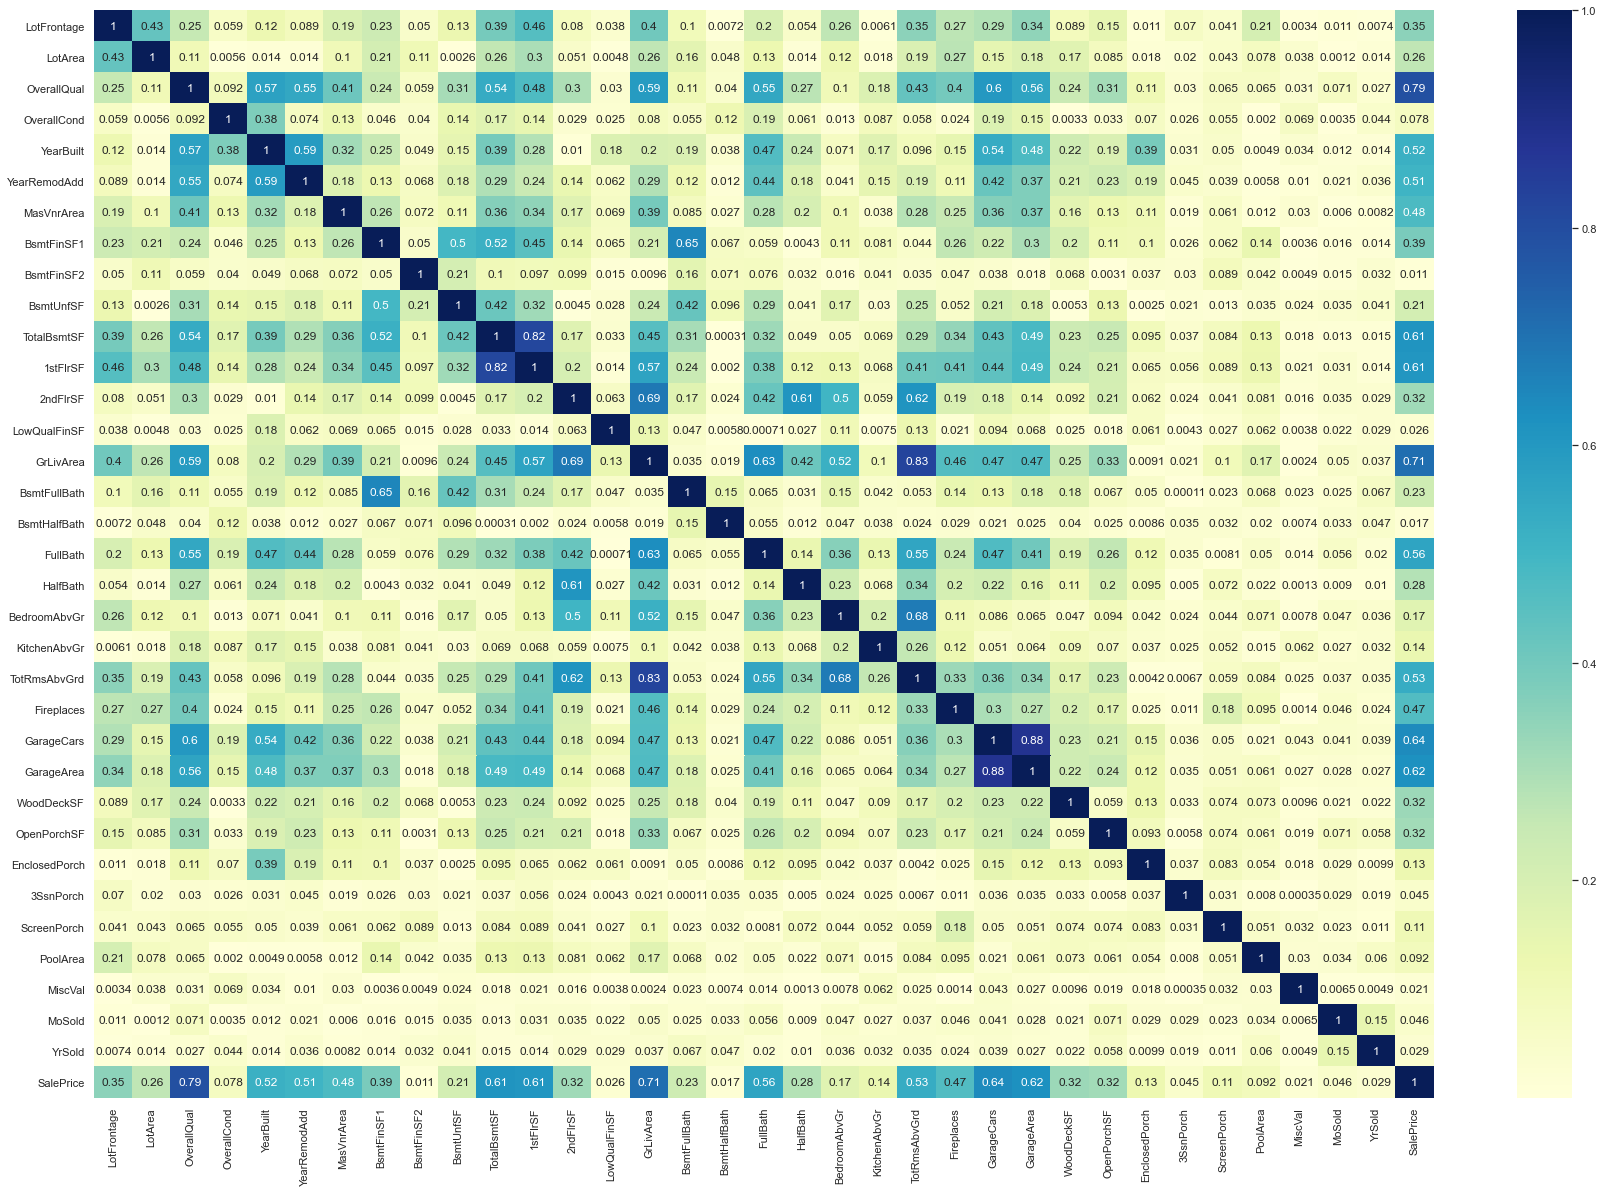

In [791]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## 2) Data Cleaning

### Outlier Analysis

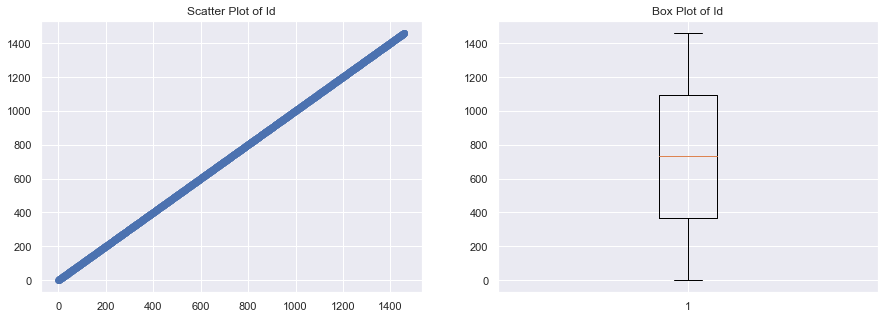

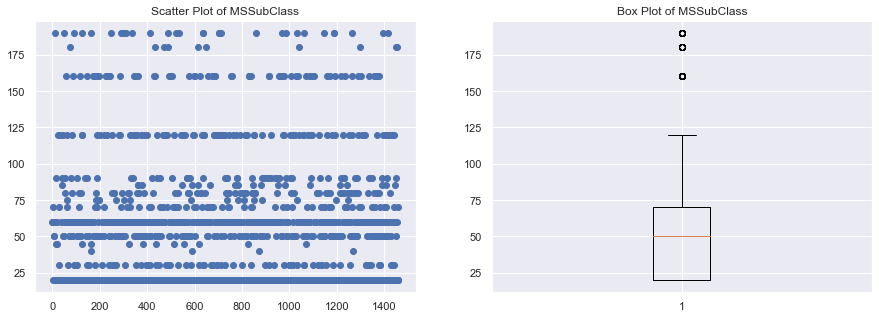

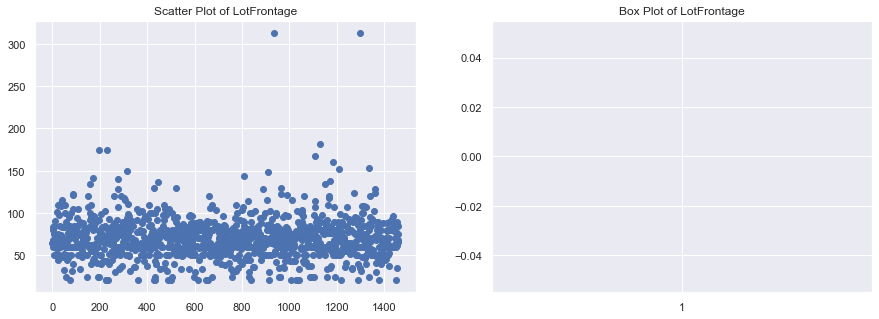

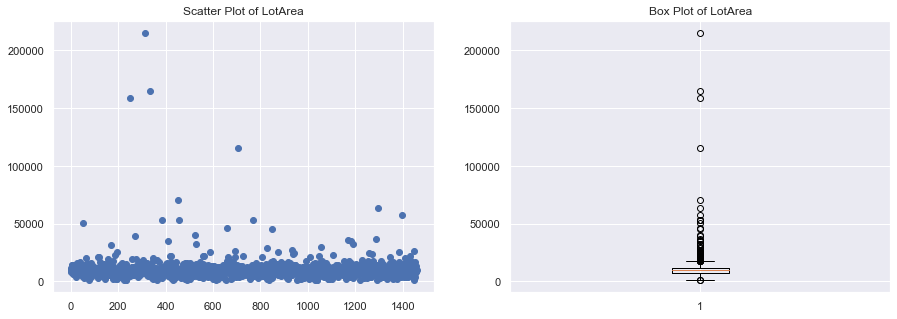

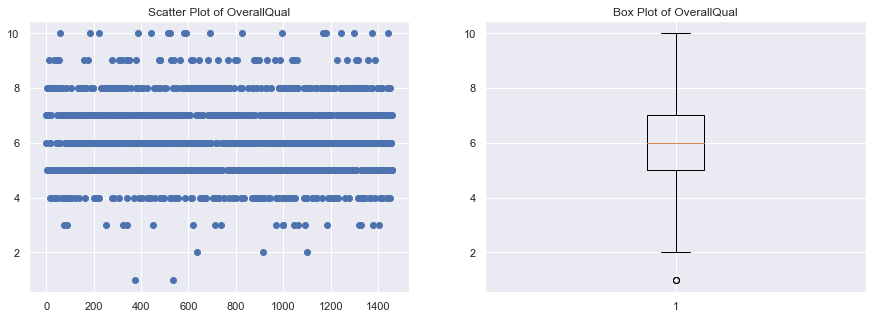

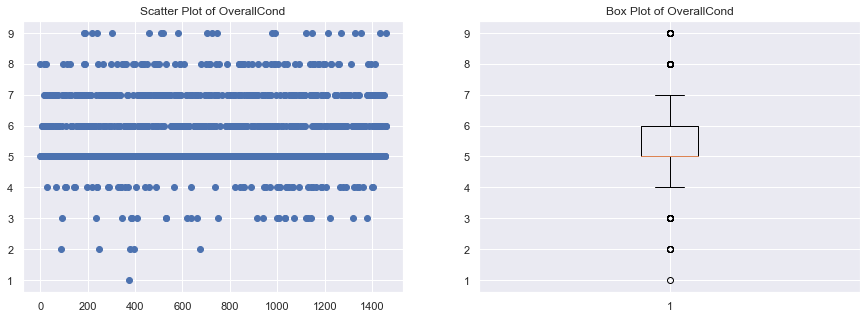

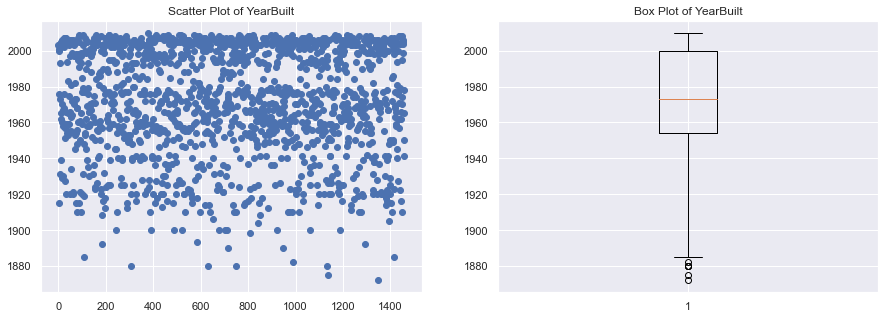

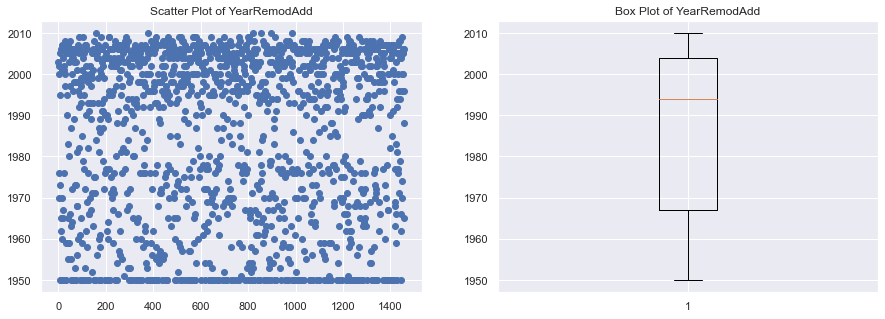

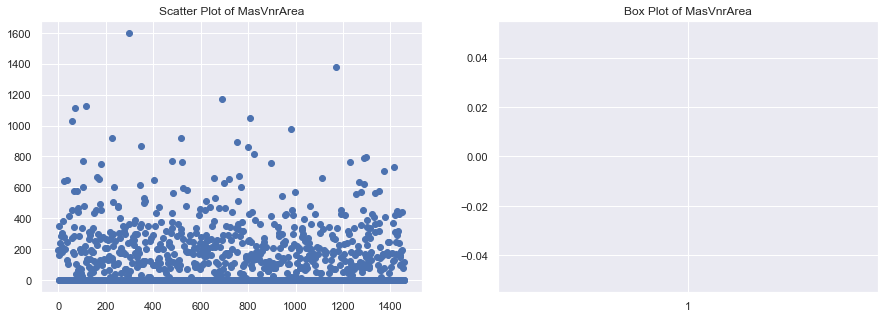

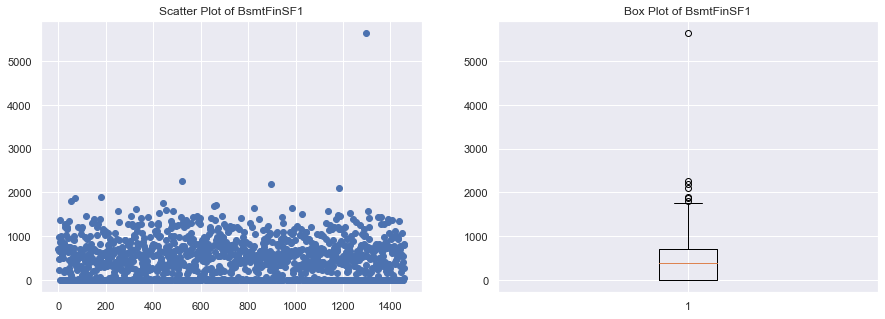

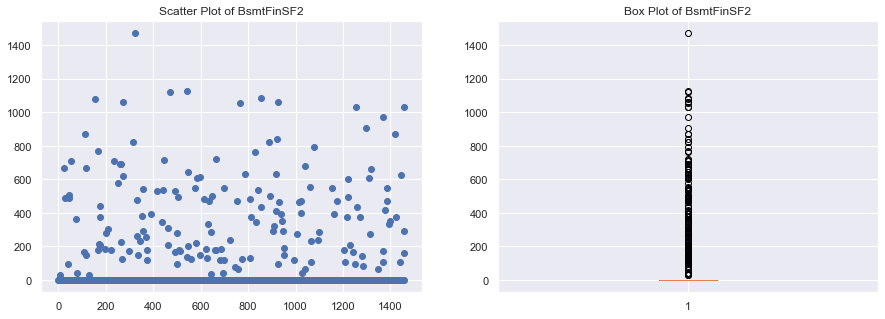

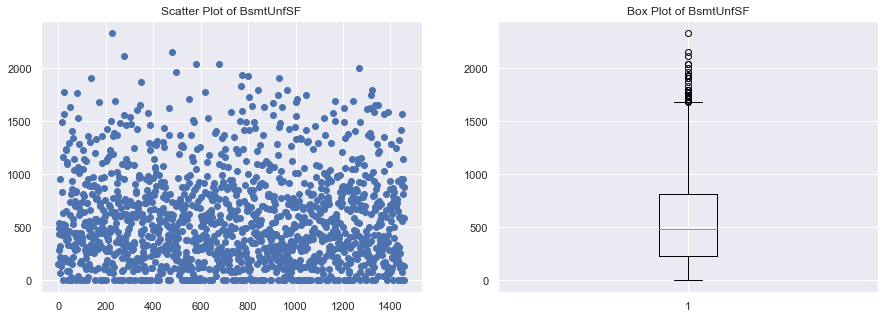

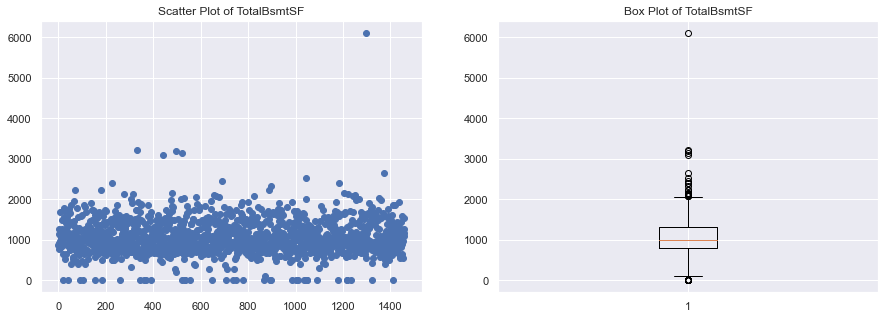

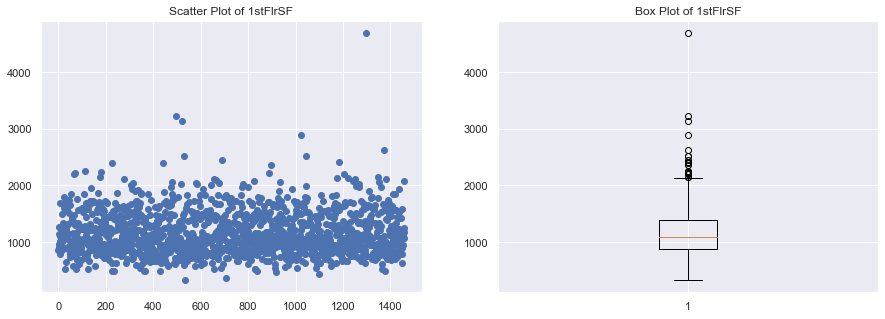

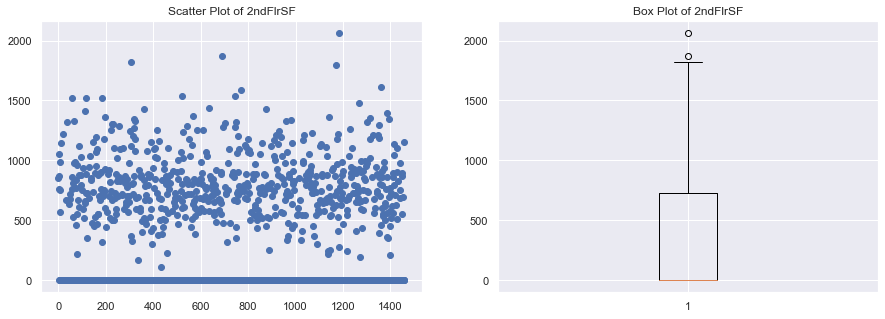

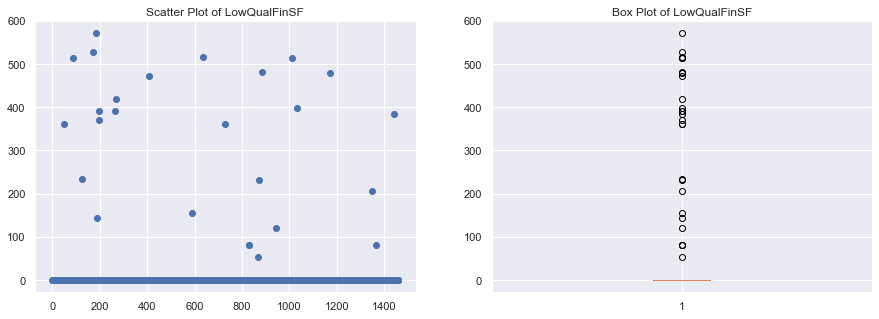

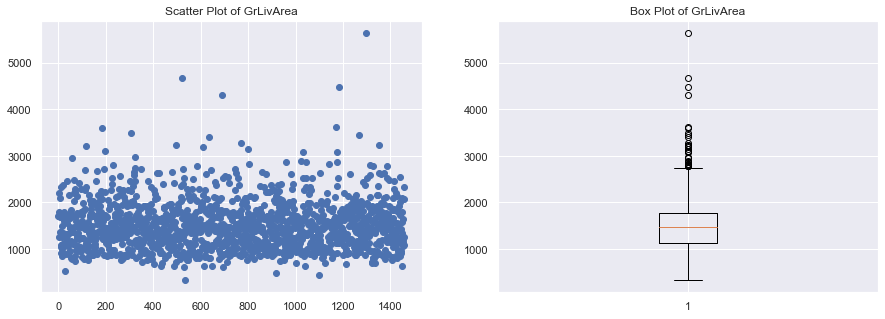

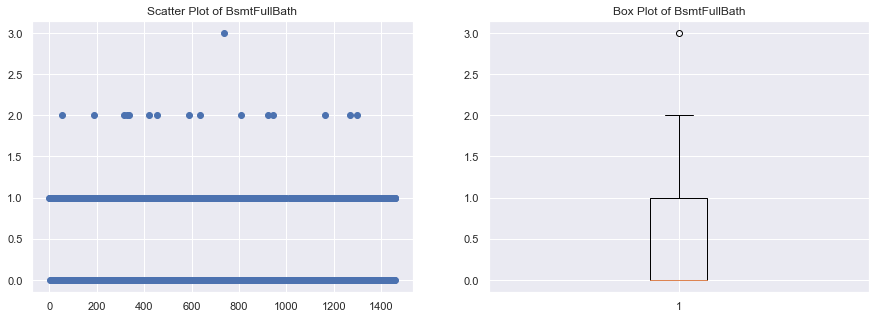

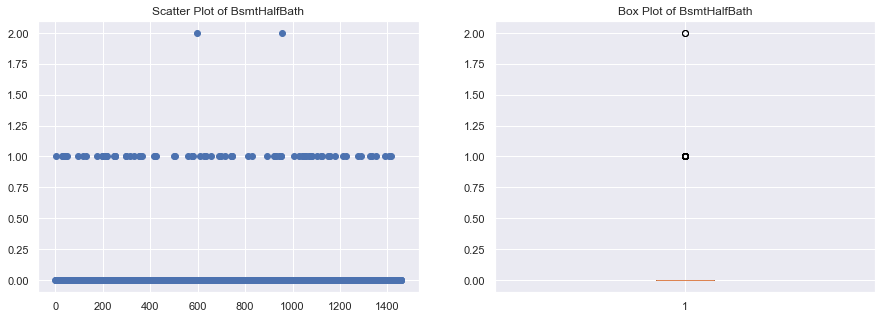

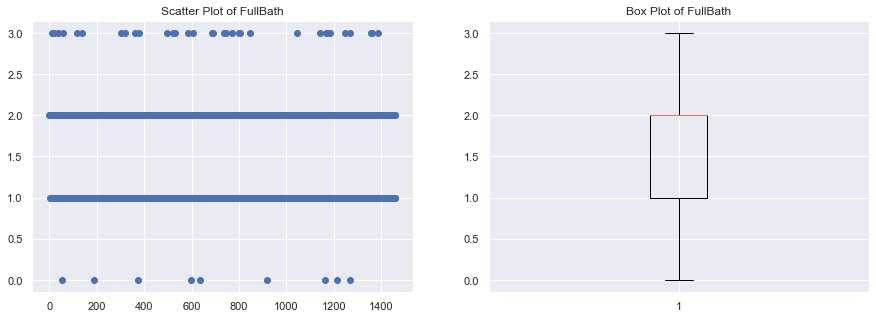

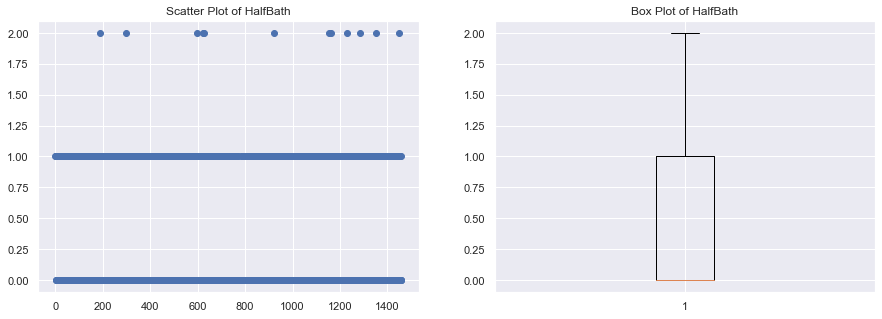

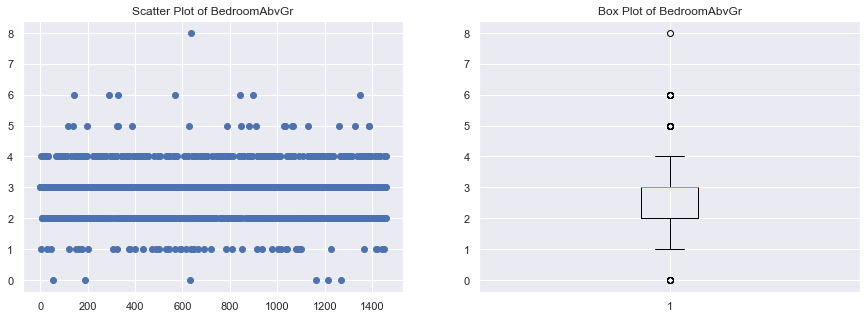

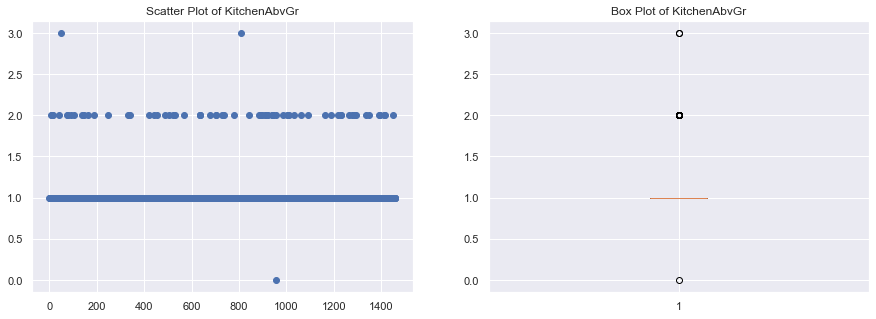

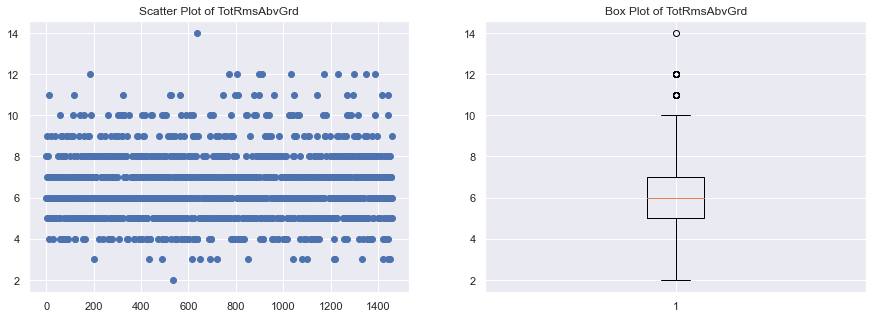

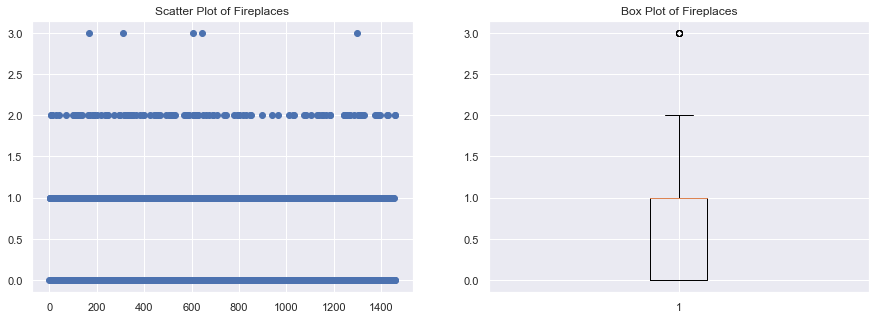

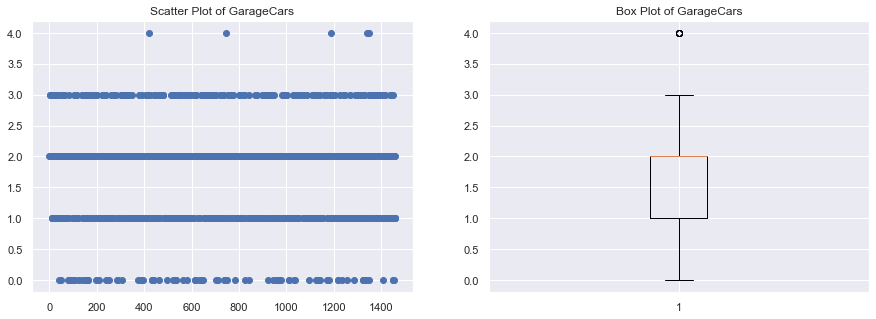

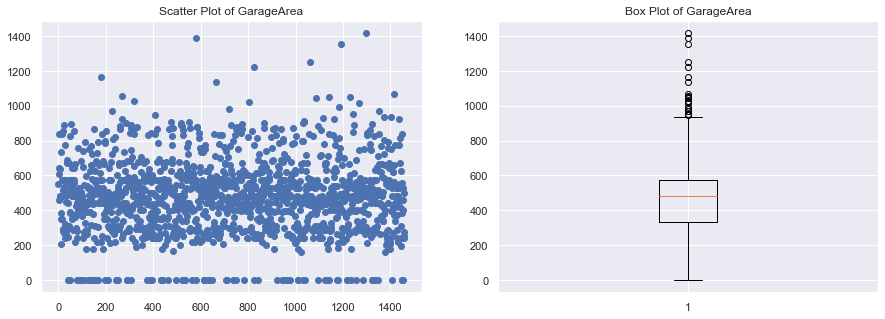

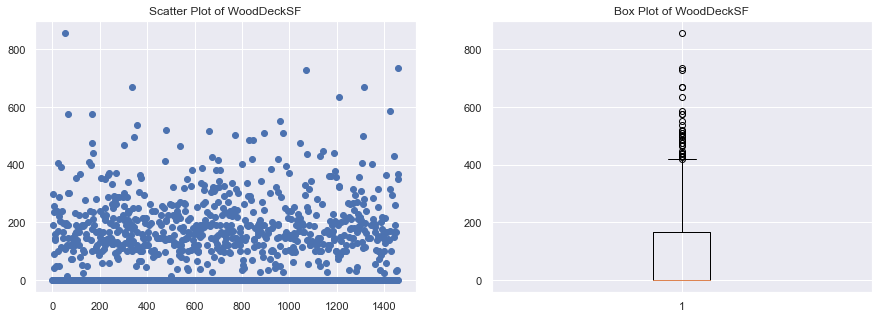

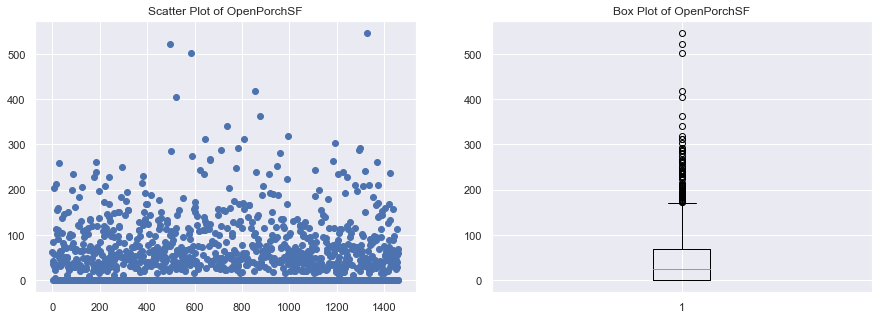

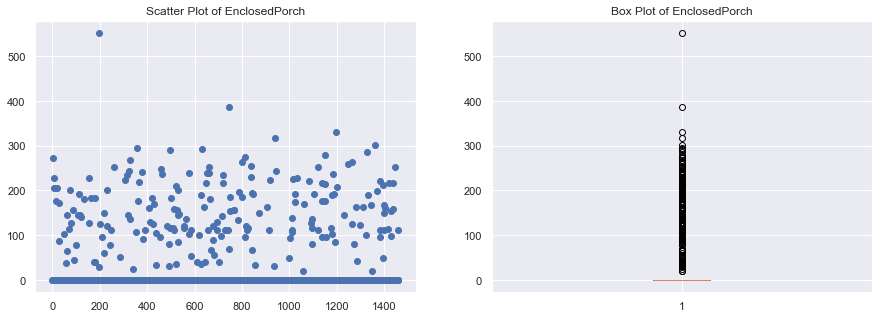

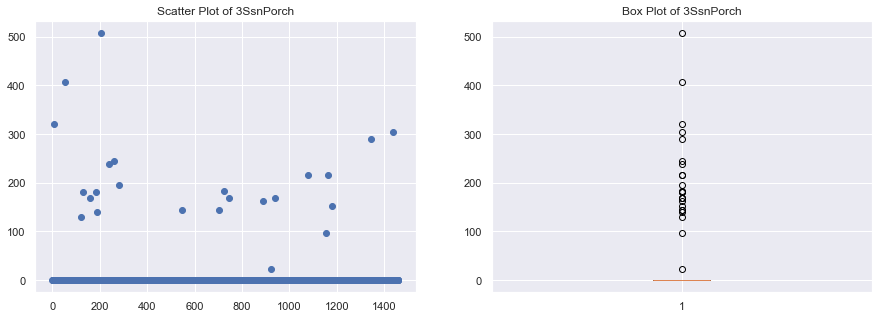

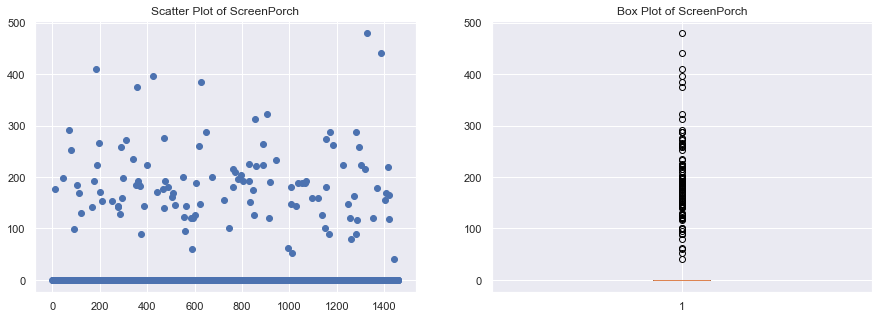

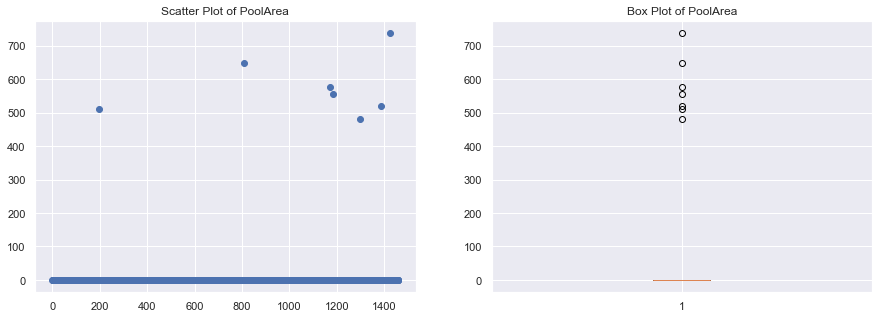

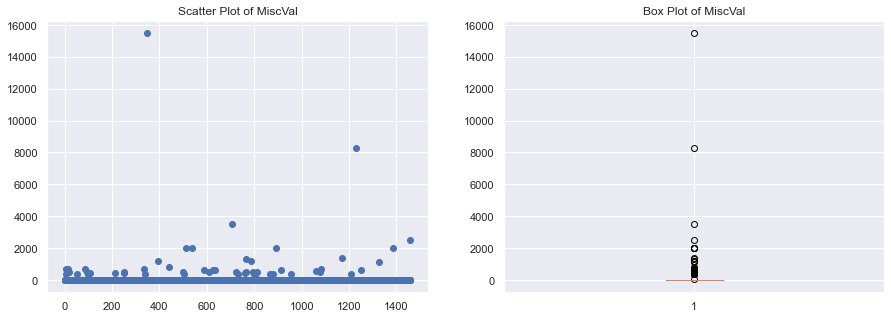

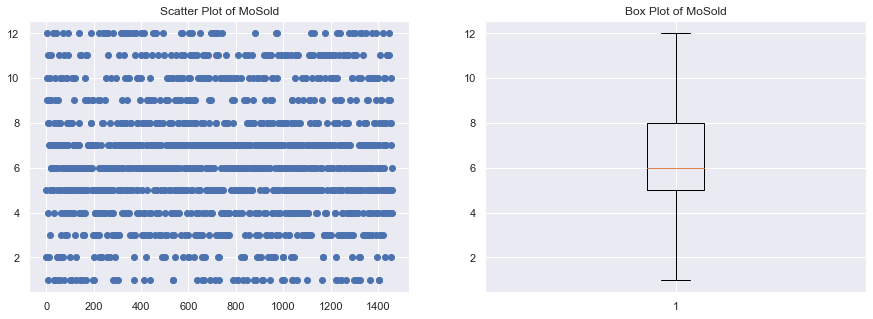

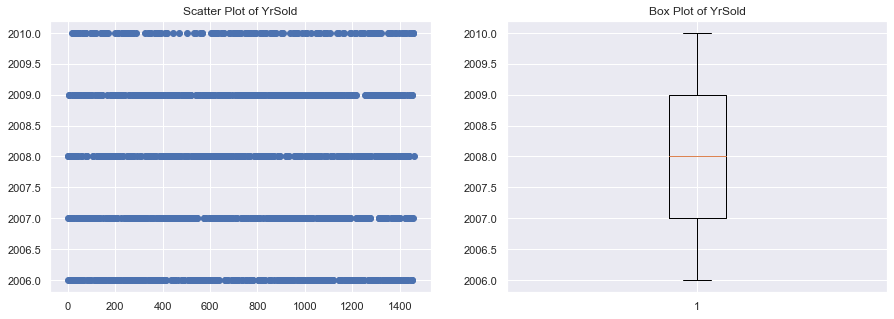

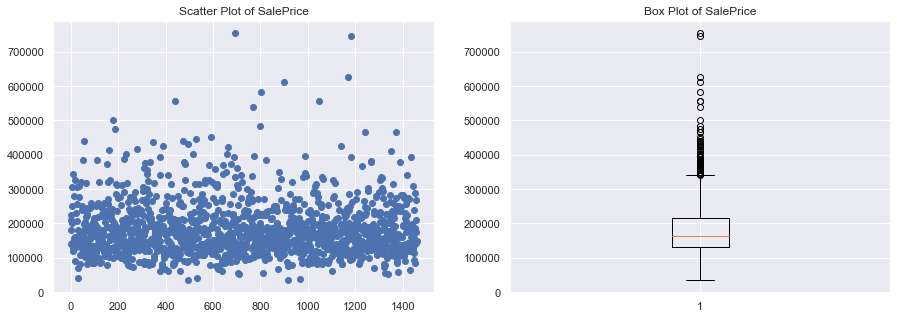

In [792]:
for col in numcol:
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    plt.scatter(housing.index,housing[col])
    plt.title('Scatter Plot of '+col)
    plt.subplot(1,2,2)
    plt.boxplot(housing[col])
    plt.title('Box Plot of '+col)
    plt.show()

Apply soft capping on upper outliers of 

'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF'

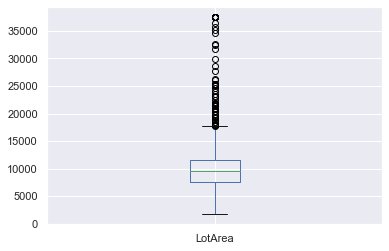

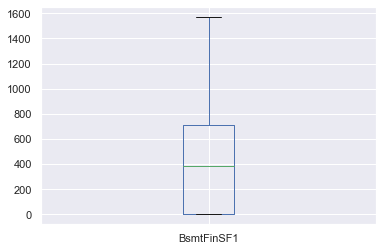

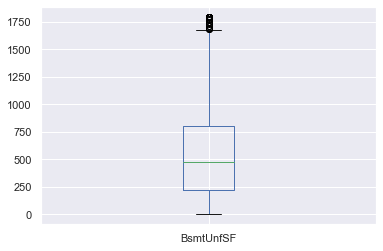

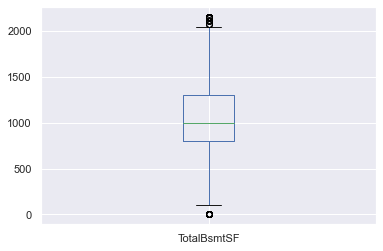

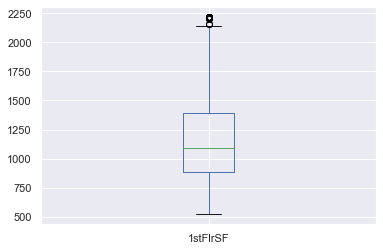

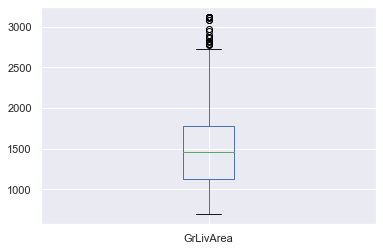

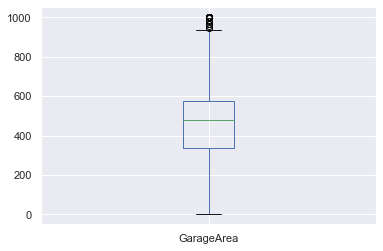

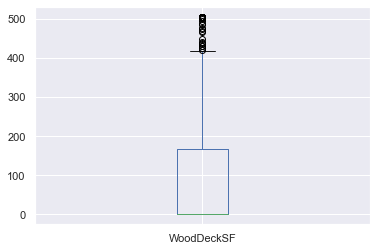

In [793]:
cols=['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF']

for i in cols:
    q1=housing[i].quantile(0.01)
    q2=housing[i].quantile(0.99)
    housing[i][housing[i]<q1]=q1
    housing[i][housing[i]>q2]=q2
    housing[i].plot.box()
    plt.show()

Most of the outliers are reduced, But there are still some outliers in LotArea,
Apply Hard Capping on LotArea.

In [794]:
housing[housing.LotArea>20000].shape

(53, 78)

In [795]:
housing.LotArea.quantile(0.95)

17401.15

In [796]:
housing[housing.LotArea>17401].shape

(73, 78)

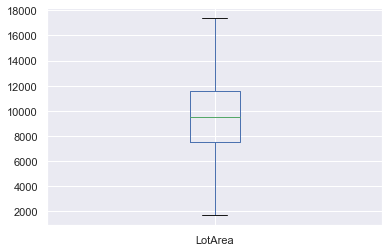

In [797]:
#Apply Hard Capping on LotArea
q=housing.LotArea.quantile(0.95)
housing.LotArea[housing.LotArea>q]=q
housing.LotArea.plot.box();

### Missing Value Treatment

In [798]:
housing.isna().sum().sort_values(ascending=False)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
SalePrice         0
               ... 
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Id                0
Length: 78, dtype: int64

In [799]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [800]:
housing.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [801]:
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [802]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [803]:
#MA in LotFrontage means there is no Linear feet of street connected to property
housing.LotFrontage.fillna(0,inplace=True)

#Fill missing values in MasVnrArea with 0 and MasVnrType by 'None'
housing.MasVnrArea.fillna(0,inplace=True)
housing.MasVnrType.fillna('None',inplace=True)
housing.Electrical.fillna('Mix',inplace=True)
housing.isna().sum().sort_values(ascending=False)

SalePrice       0
ExterCond       0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
Length: 78, dtype: int64

In [804]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Club the categories with less value counts in order to reduce the number of dummies.

In [805]:
housing.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [806]:
housing.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [807]:
housing.MSZoning=housing.MSZoning.replace(['FV','RH','C (all)'],'Others')
housing.MSZoning.value_counts()

RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64

In [808]:
housing.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [809]:
housing.LotConfig=housing.LotConfig.replace(['CulDSac','FR2','FR3'],'Others')
housing.LotConfig.value_counts()

Inside    1052
Corner     263
Others     145
Name: LotConfig, dtype: int64

In [810]:
housing.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [811]:
housing.LandSlope=housing.LandSlope.replace(['Mod','Sev'],'Others')
housing.LandSlope.value_counts()

Gtl       1382
Others      78
Name: LandSlope, dtype: int64

In [812]:
housing.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [813]:
housing.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [814]:
housing.Condition1=housing.Condition1.replace(['Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'Others')
housing.Condition1.value_counts()

Norm      1260
Others     119
Feedr       81
Name: Condition1, dtype: int64

In [815]:
housing.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [816]:
housing.BldgType=housing.BldgType.replace(['Duplex','Twnhs','2fmCon'],'Others')
housing.BldgType.value_counts()

1Fam      1220
Others     126
TwnhsE     114
Name: BldgType, dtype: int64

In [817]:
housing.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [818]:
housing.HouseStyle=housing.HouseStyle.replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
Others    135
Name: HouseStyle, dtype: int64

In [819]:
housing.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [820]:
housing.RoofStyle=housing.RoofStyle.replace(['Flat','Gambrel','Mansard','Shed'],'Others')

In [821]:
housing.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [822]:
housing.Exterior1st=housing.Exterior1st.replace(['BrkFace','WdShing','Stucco','AsbShng','Stone','BrkComm','AsphShn','ImStucc','CBlock'],'Others')
housing.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Others     128
Plywood    108
CemntBd     61
Name: Exterior1st, dtype: int64

In [823]:
housing.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [824]:
housing.Exterior2nd=housing.Exterior2nd.replace(['BrkFace','Wd Shng','Stucco','AsbShng','Stone','Brk Cmn','AsphShn','ImStucc','CBlock','Other'],'Others')
housing.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Others     136
CmentBd     60
Name: Exterior2nd, dtype: int64

In [825]:
housing.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [826]:
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']:
    housing[i]=housing[i].replace(['NA','No_Basement','None','No_Garage'],0)
    housing[i]=housing[i].replace(['Po','PO'],1)
    housing[i]=housing[i].replace(['FA','Fa'],2)
    housing[i]=housing[i].replace(['TA','Ta'],3)
    housing[i]=housing[i].replace(['Gd','GD'],4)
    housing[i]=housing[i].replace(['EX','Ex'],5)

In [827]:
housing.ExterCond.value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

In [828]:
housing.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [829]:
housing.BsmtQual.value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [830]:
housing.BsmtCond.value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [831]:
housing.HeatingQC.value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

In [832]:
housing.KitchenQual.value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

In [833]:
housing.FireplaceQu.value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [834]:
housing.GarageQual.value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [835]:
housing.GarageCond.value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [836]:
housing.CentralAir=housing.CentralAir.replace('Y',1)
housing.CentralAir=housing.CentralAir.replace('N',0)
housing.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [837]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         2
Name: Electrical, dtype: int64

In [838]:
housing.Electrical=housing.Electrical.replace(['FuseF','FuseP','Mix'],'Others')

In [839]:
housing.BsmtFinType2.value_counts()

Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [840]:
housing.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [841]:
housing.Functional=housing.Functional.replace(['Min2','Min1','Mod','Maj1','Maj2','Sev'],'Others')

In [842]:
housing.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [843]:
housing.GarageType=housing.GarageType.replace(['Basment','CarPort','2Types'],'Others')
housing.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Others        34
Name: GarageType, dtype: int64

In [844]:
housing.GarageFinish.value_counts()

Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64

In [845]:
housing.GarageFinish=housing.GarageFinish.map(lambda x:0 if x=='No_Garage' else 1 if x=='Unf' else 2 if x=='RFn' else 3)
housing.GarageFinish.value_counts()

1    605
2    422
3    352
0     81
Name: GarageFinish, dtype: int64

In [846]:
housing.Fence.value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [847]:
housing.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [848]:
housing.SaleType=housing.SaleType.replace(['COD','ConLD','ConLw','ConLI','CWD','Oth','Con'],'Others')
housing.SaleType.value_counts()

WD        1267
New        122
Others      71
Name: SaleType, dtype: int64

In [849]:
housing.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [850]:
housing.SaleCondition=housing.SaleCondition.replace(['Family','Alloca','AdjLand'],'Others')
housing.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Others       36
Name: SaleCondition, dtype: int64

In [851]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [852]:
housing.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [853]:
housing.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [854]:
housing.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [855]:
#drop 'Utilities','Condition2','RoofMatl','Heating'
housing.drop(['Utilities','Condition2','RoofMatl','Heating'],axis=1,inplace=True)

In [856]:
housing.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    730.500000    56.897260    57.623288   9635.085582     6.099315   
std     421.610009    42.300571    34.664304   3563.790359     1.382997   
min       1.000000    20.000000     0.000000   1680.000000     1.000000   
25%     365.750000    20.000000    42.000000   7553.500000     5.000000   
50%     730.500000    50.000000    63.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000  11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  17401.150000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   ExterQual  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.00000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123     3.39589  ...   
std       1.112799    30.202904     20.645407   180.731373     0.57428  ...   
min       1.000000  1872.000000   1950.000000     0.000000     2.00000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     3.00000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000     3.00000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000     4.00000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000     5.00000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     93.155411    46.660274      21.954110     3.409589    15.060959   
std     120.812804    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     505.460000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 48 columns]

## 3) Data Preparation

In [857]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [858]:
#introduce new column 'Age_of_House' and delete 'YearBuilt'
housing['Age_of_House']=housing.YrSold-housing.YearBuilt

In [859]:
#drop columns 'Id','YearRemodAdd','YrSold','YearBuilt','MoSold'
housing.drop(['Id','YearRemodAdd','YrSold','YearBuilt','MoSold'],axis=1,inplace=True)

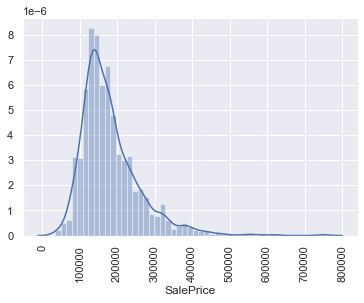

In [860]:
sns.distplot(housing.SalePrice)
plt.xticks(rotation=90);

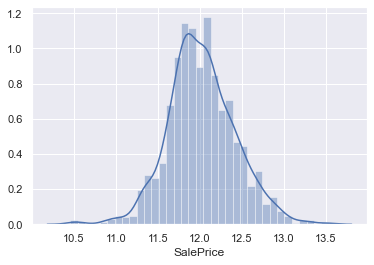

In [861]:
#Apply transformation on SalePrice to remove Skewness.
sns.distplot(np.log(housing.SalePrice));

In [862]:
# Transform the SalePrice to tackle skeewness, and drop original column.
housing['SalePriceTransformed']=np.log(housing.SalePrice)
housing.drop('SalePrice',axis=1,inplace=True)

In [863]:
#convert Neighborhood column to numeric using LabelEncoding as there are 20 categories present in column
label_encoder = preprocessing.LabelEncoder()
housing.Neighborhood=label_encoder.fit_transform(housing.Neighborhood)
housing.Neighborhood.value_counts()

12    225
5     150
17    113
7     100
21     86
8      79
16     77
19     74
14     73
20     59
3      58
6      51
11     49
15     41
23     38
9      37
4      28
18     25
22     25
0      17
10     17
2      16
24     11
13      9
1       2
Name: Neighborhood, dtype: int64

In [864]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   MSZoning              1460 non-null   object 
 2   LotFrontage           1460 non-null   float64
 3   LotArea               1460 non-null   float64
 4   Street                1460 non-null   object 
 5   Alley                 1460 non-null   object 
 6   LotShape              1460 non-null   object 
 7   LandContour           1460 non-null   object 
 8   LotConfig             1460 non-null   object 
 9   LandSlope             1460 non-null   object 
 10  Neighborhood          1460 non-null   int32  
 11  Condition1            1460 non-null   object 
 12  BldgType              1460 non-null   object 
 13  HouseStyle            1460 non-null   object 
 14  OverallQual           1460 non-null   int64  
 15  OverallCond          

In [865]:
#Split in X adn y
X=housing.drop('SalePriceTransformed',axis=1)
y=housing.SalePriceTransformed

In [866]:
# creating dummy variables for categorical variables

# subset all categorical variables

catcol=X.select_dtypes(include=['object'])
catcol

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
0          RL   Pave  None      Reg         Lvl    Inside       Gtl   
1          RL   Pave  None      Reg         Lvl    Others       Gtl   
2          RL   Pave  None      IR1         Lvl    Inside       Gtl   
3          RL   Pave  None      IR1         Lvl    Corner       Gtl   
4          RL   Pave  None      IR1         Lvl    Others       Gtl   
...       ...    ...   ...      ...         ...       ...       ...   
1455       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1456       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1457       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1458       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1459       RL   Pave  None      Reg         Lvl    Inside       Gtl   

     Condition1 BldgType HouseStyle  ... BsmtExposure BsmtFinType1  \
0          Norm     1Fam     2Story  ...           No          GLQ   
1         Feedr     1Fam     1Story  ...           Gd          ALQ   
2          Norm     1Fam     2Story  ...           Mn          GLQ   
3          Norm     1Fam     2Story  ...           No          ALQ   
4          Norm     1Fam     2Story  ...           Av          GLQ   
...         ...      ...        ...  ...          ...          ...   
1455       Norm     1Fam     2Story  ...           No          Unf   
1456       Norm     1Fam     1Story  ...           No          ALQ   
1457       Norm     1Fam     2Story  ...           No          GLQ   
1458       Norm     1Fam     1Story  ...           Mn          GLQ   
1459       Norm     1Fam     1Story  ...           No          BLQ   

     BsmtFinType2 Electrical Functional GarageType PavedDrive  Fence SaleType  \
0             Unf      SBrkr        Typ     Attchd          Y   None       WD   
1             Unf      SBrkr        Typ     Attchd          Y   None       WD   
2             Unf      SBrkr        Typ     Attchd          Y   None       WD   
3             Unf      SBrkr        Typ     Detchd          Y   None       WD   
4             Unf      SBrkr        Typ     Attchd          Y   None       WD   
...           ...        ...        ...        ...        ...    ...      ...   
1455          Unf      SBrkr        Typ     Attchd          Y   None       WD   
1456          Rec      SBrkr     Others     Attchd          Y  MnPrv       WD   
1457          Unf      SBrkr        Typ     Attchd          Y  GdPrv       WD   
1458          Rec      FuseA        Typ     Attchd          Y   None       WD   
1459          LwQ      SBrkr        Typ     Attchd          Y   None       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 25 columns]

In [867]:
X_dummies=pd.get_dummies(catcol,drop_first=True)
X_dummies.head()

MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0            1            0            1           1           0   
1            1            0            1           1           0   
2            1            0            1           1           0   
3            1            0            1           1           0   
4            1            0            1           1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  PavedDrive_Y  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  \
0  ...             1           0            0           0           1   
1  ...             1           0            0           0           1   
2  ...             1           0            0           0           1   
3  ...             1           0            0           0           1   
4  ...             1           0            0           0           1   

   SaleType_Others  SaleType_WD  SaleCondition_Normal  SaleCondition_Others  \
0                0            1                     1                     0   
1                0            1                     1                     0   
2                0            1                     1                     0   
3                0            1                     0                     0   
4                0            1                     1                     0   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 77 columns]

In [868]:
X.drop(list(catcol.columns),axis=1,inplace=True)

In [869]:
X=pd.concat([X,X_dummies],axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  Neighborhood  OverallQual  OverallCond  \
0          60         65.0   8450.0             5            7            5   
1          20         80.0   9600.0            24            6            8   
2          60         68.0  11250.0             5            7            5   
3          70         60.0   9550.0             6            7            5   
4          60         84.0  14260.0            15            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  PavedDrive_Y  Fence_GdWo  \
0       196.0          4          3         4  ...             1           0   
1         0.0          3          3         4  ...             1           0   
2       162.0          4          3         4  ...             1           0   
3         0.0          3          3         3  ...             1           0   
4       350.0          4          3         4  ...             1           0   

   Fence_MnPrv  Fence_MnWw  Fence_None  SaleType_Others  SaleType_WD  \
0            0           0           1                0            1   
1            0           0           1                0            1   
2            0           0           1                0            1   
3            0           0           1                0            1   
4            0           0           1                0            1   

   SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
0                     1                     0                      0  
1                     1                     0                      0  
2                     1                     0                      0  
3                     0                     0                      0  
4                     1                     0                      0  

[5 rows x 121 columns]

### Checking Correlations in dummy variables

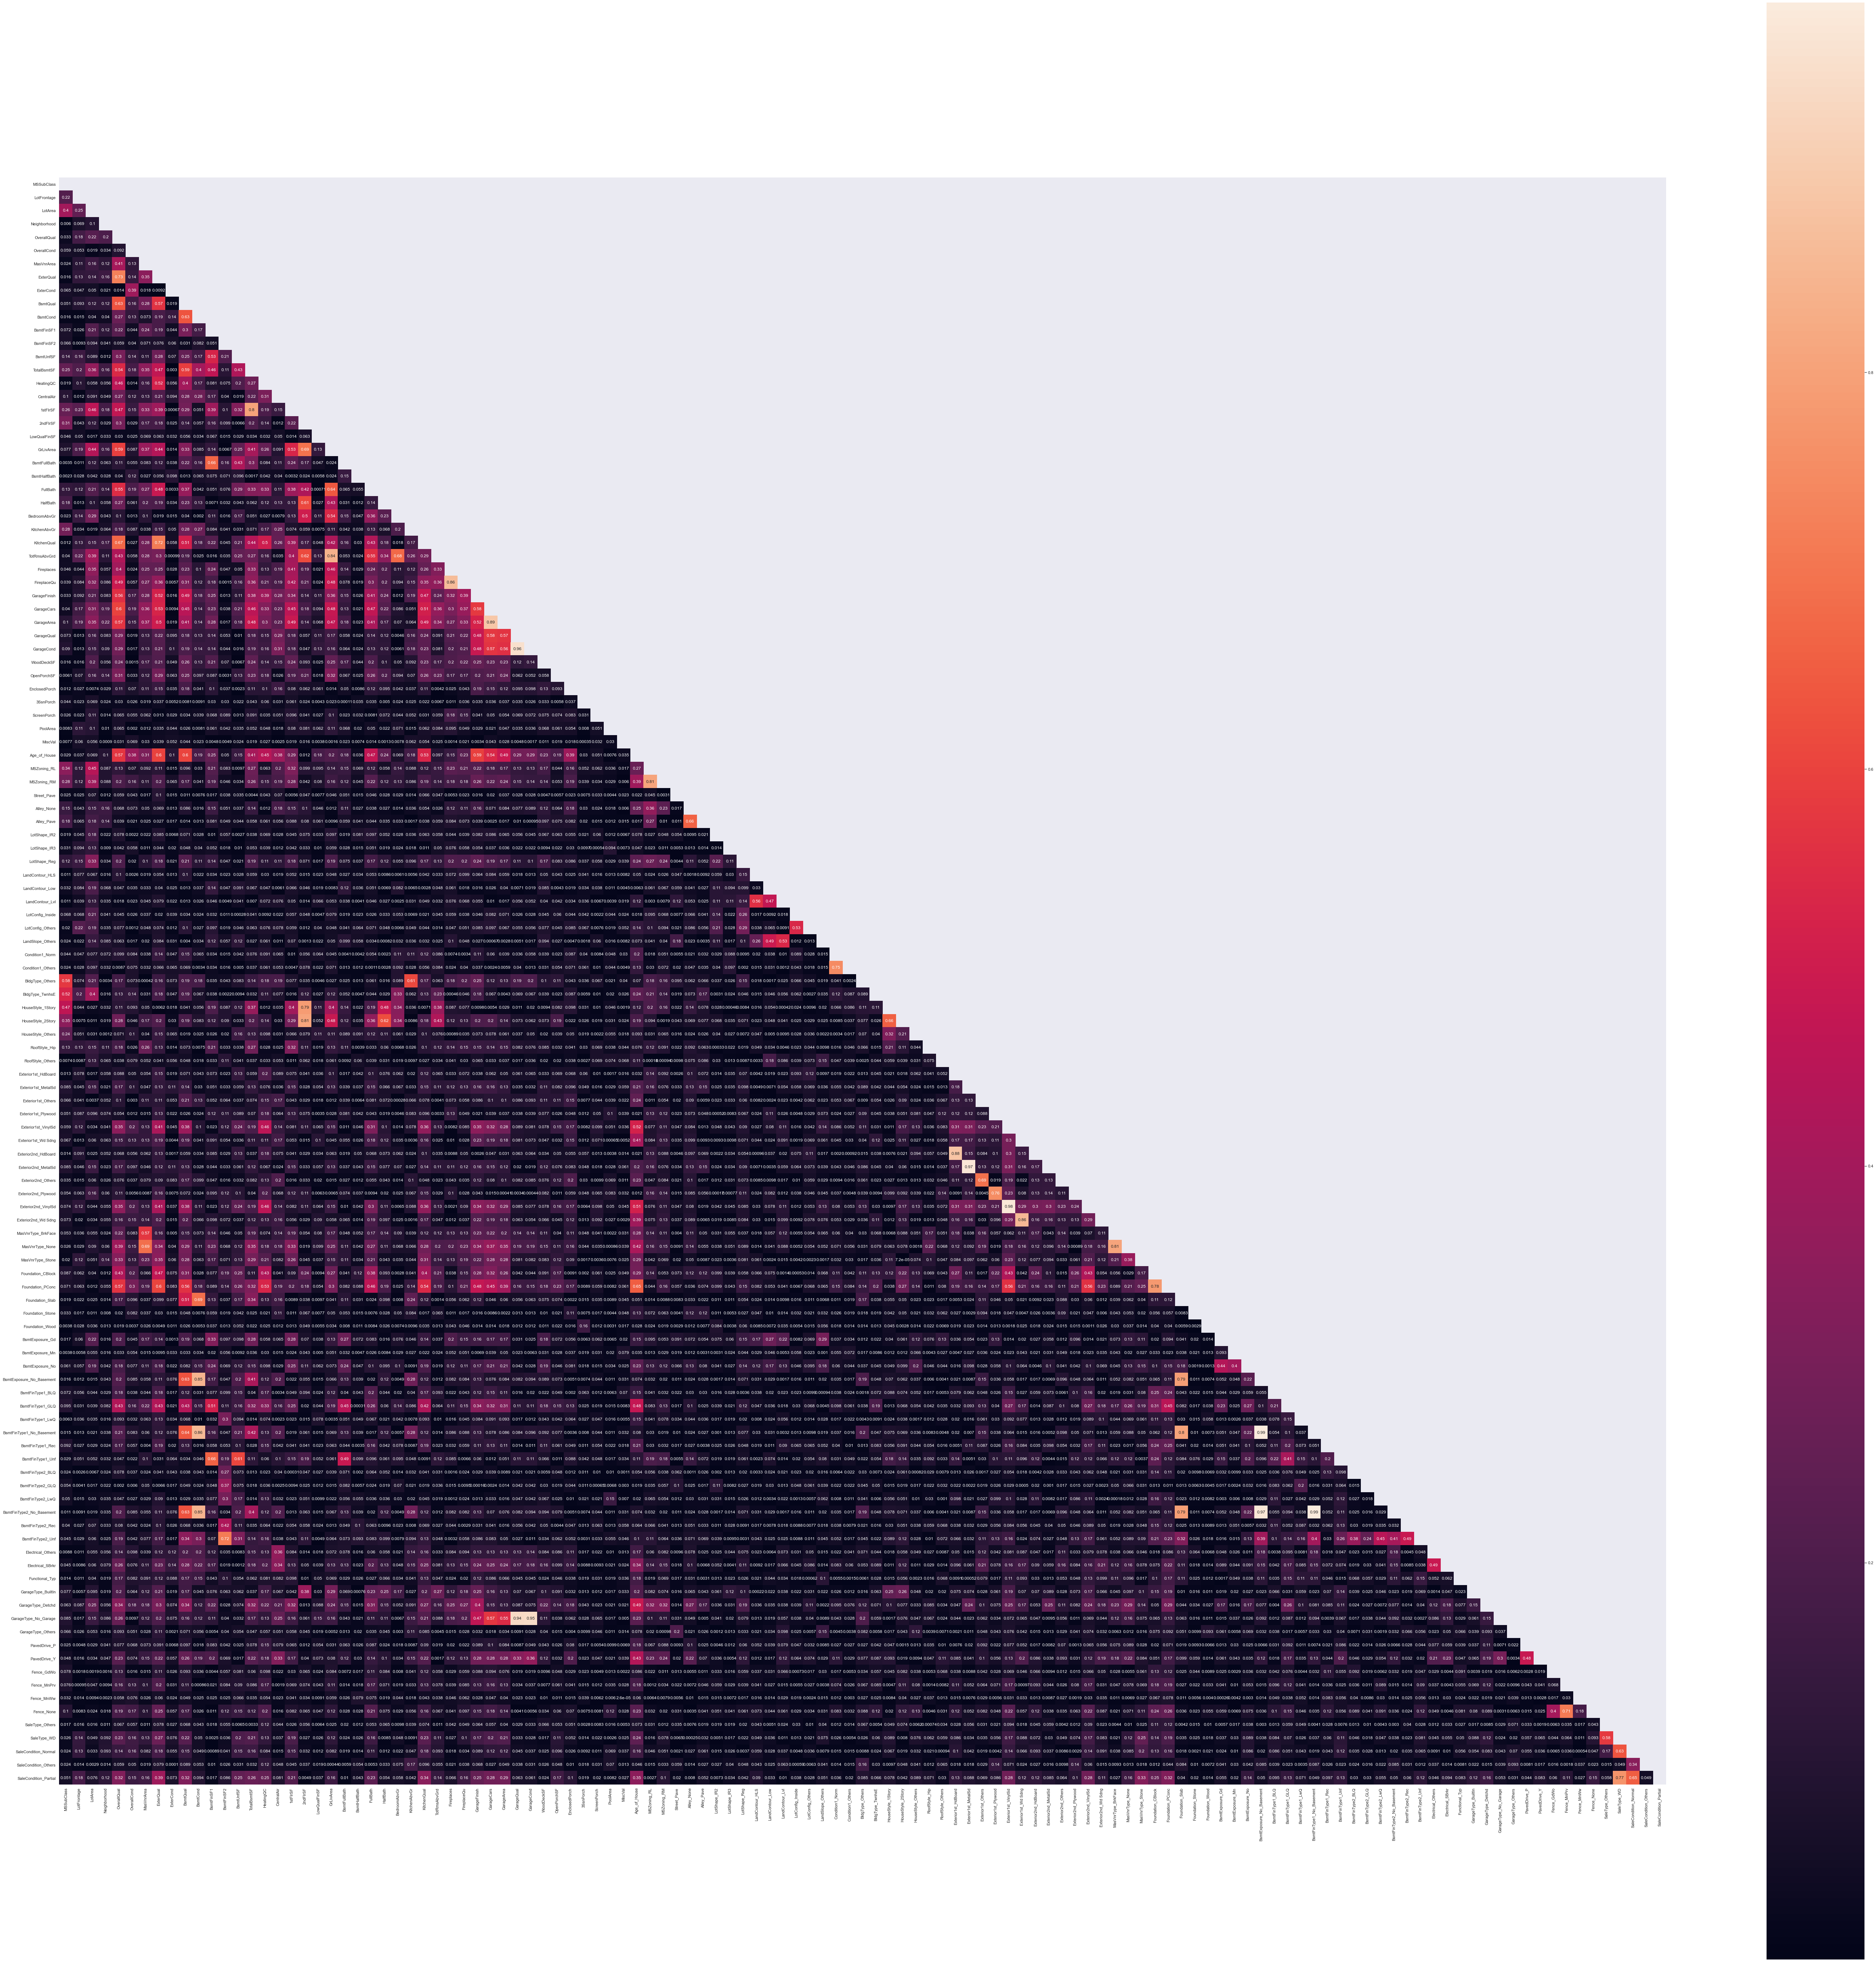

In [870]:
corr = X.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(100, 100))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, square=True);

We need to drop the columns with high correlation. 'GarageType_No_Garage','BsmtFinType2_No_Basement','BsmtFinType1_No_Basement','BsmtExposure_No_Basement','Exterior2nd_VinylSd',
'Exterior2nd_Plywood','Exterior2nd_Wd Sdng','Exterior2nd_MetalSd','Exterior2nd_HdBoard','GarageCond','TotRmsAbvGrd'

In [871]:
X.drop(['GarageType_No_Garage','BsmtFinType2_No_Basement','BsmtFinType1_No_Basement','BsmtExposure_No_Basement','Exterior2nd_VinylSd',
'Exterior2nd_Plywood','Exterior2nd_Wd Sdng','Exterior2nd_MetalSd','Exterior2nd_HdBoard','GarageCond','TotRmsAbvGrd'],axis=1,inplace=True)

In [872]:
numcol=X.columns

In [873]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [874]:
X_train.describe()

MSSubClass  LotFrontage       LotArea  Neighborhood  OverallQual  \
count  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   
mean     58.442703    57.582762   9596.881146     12.261508     6.091087   
std      43.308333    34.401953   3556.048402      5.974880     1.399765   
min      20.000000     0.000000   1680.000000      0.000000     1.000000   
25%      20.000000    43.000000   7446.000000      7.000000     5.000000   
50%      50.000000    60.000000   9500.000000     12.000000     6.000000   
75%      70.000000    78.000000  11512.000000     17.000000     7.000000   
max     190.000000   313.000000  17401.150000     24.000000    10.000000   

       OverallCond   MasVnrArea    ExterQual    ExterCond     BsmtQual  ...  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  ...   
mean      5.581783   104.489716     3.398629     3.091087     3.478942  ...   
std       1.092048   187.341089     0.571168     0.349410     0.900325  ...   
min       1.000000     0.000000     2.000000     2.000000     0.000000  ...   
25%       5.000000     0.000000     3.000000     3.000000     3.000000  ...   
50%       5.000000     0.000000     3.000000     3.000000     4.000000  ...   
75%       6.000000   158.000000     4.000000     3.000000     4.000000  ...   
max       9.000000  1600.000000     5.000000     5.000000     5.000000  ...   

       PavedDrive_Y   Fence_GdWo  Fence_MnPrv   Fence_MnWw   Fence_None  \
count   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean       0.915769     0.032321     0.104799     0.006856     0.818805   
std        0.277870     0.176939     0.306445     0.082557     0.385368   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000     0.000000     0.000000     0.000000     1.000000   
50%        1.000000     0.000000     0.000000     0.000000     1.000000   
75%        1.000000     0.000000     0.000000     0.000000     1.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       SaleType_Others  SaleType_WD  SaleCondition_Normal  \
count      1021.000000  1021.000000           1021.000000   
mean          0.050930     0.870715              0.825661   
std           0.219963     0.335680              0.379587   
min           0.000000     0.000000              0.000000   
25%           0.000000     1.000000              1.000000   
50%           0.000000     1.000000              1.000000   
75%           0.000000     1.000000              1.000000   
max           1.000000     1.000000              1.000000   

       SaleCondition_Others  SaleCondition_Partial  
count           1021.000000            1021.000000  
mean               0.024486               0.078355  
std                0.154627               0.268860  
min                0.000000               0.000000  
25%                0.000000               0.000000  
50%                0.000000               0.000000  
75%                0.000000               0.000000  
max                1.000000               1.000000  

[8 rows x 110 columns]

In [875]:
X_test.describe()



MSSubClass  LotFrontage       LotArea  Neighborhood  OverallQual  \
count  438.000000   438.000000    438.000000    438.000000   438.000000   
mean    53.287671    57.639269   9723.491553     12.221461     6.116438   
std     39.717704    35.308610   3588.308444      6.115501     1.345440   
min     20.000000     0.000000   1680.000000      0.000000     1.000000   
25%     20.000000    40.250000   7752.000000      7.000000     5.000000   
50%     50.000000    65.000000   9387.500000     12.000000     6.000000   
75%     60.000000    80.000000  11700.000000     17.000000     7.000000   
max    190.000000   313.000000  17401.150000     23.000000    10.000000   

       OverallCond  MasVnrArea   ExterQual   ExterCond    BsmtQual  ...  \
count   438.000000  438.000000  438.000000  438.000000  438.000000  ...   
mean      5.561644  100.152968    3.388128    3.066210    3.511416  ...   
std       1.161782  164.612469    0.581992    0.355023    0.819447  ...   
min       2.000000    0.000000    2.000000    1.000000    0.000000  ...   
25%       5.000000    0.000000    3.000000    3.000000    3.000000  ...   
50%       5.000000    0.000000    3.000000    3.000000    4.000000  ...   
75%       6.000000  174.000000    4.000000    3.000000    4.000000  ...   
max       9.000000  921.000000    5.000000    5.000000    5.000000  ...   

       PavedDrive_Y  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  \
count    438.000000  438.000000   438.000000  438.000000  438.000000   
mean       0.922374    0.047945     0.114155    0.009132    0.780822   
std        0.267887    0.213895     0.318363    0.095235    0.414163   
min        0.000000    0.000000     0.000000    0.000000    0.000000   
25%        1.000000    0.000000     0.000000    0.000000    1.000000   
50%        1.000000    0.000000     0.000000    0.000000    1.000000   
75%        1.000000    0.000000     0.000000    0.000000    1.000000   
max        1.000000    1.000000     1.000000    1.000000    1.000000   

       SaleType_Others  SaleType_WD  SaleCondition_Normal  \
count       438.000000   438.000000            438.000000   
mean          0.043379     0.860731              0.808219   
std           0.203942     0.346623              0.394152   
min           0.000000     0.000000              0.000000   
25%           0.000000     1.000000              1.000000   
50%           0.000000     1.000000              1.000000   
75%           0.000000     1.000000              1.000000   
max           1.000000     1.000000              1.000000   

       SaleCondition_Others  SaleCondition_Partial  
count            438.000000             438.000000  
mean               0.025114               0.102740  
std                0.156651               0.303966  
min                0.000000               0.000000  
25%                0.000000               0.000000  
50%                0.000000               0.000000  
75%                0.000000               0.000000  
max                1.000000               1.000000  

[8 rows x 110 columns]

## Model Building

### 1) Linear Regression using Ridge

In [876]:
#scale the features before applying Ridge and Lasso
scaler=MinMaxScaler()
X_train[numcol]=scaler.fit_transform(X_train[numcol])
X_test[numcol]=scaler.transform(X_test[numcol])



In [877]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [878]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [879]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.03062887 -0.04264064  0.12609682  0.04606144  0.41468924  0.32076885
 -0.0251431   0.0228677  -0.02969641  0.07000397  0.0141249   0.1243353
  0.07526395  0.02146076  0.20197316  0.04578254  0.06217793  0.24239916
  0.2033017   0.01024923  0.31322734  0.06295935 -0.00932692  0.08077076
  0.03457587  0.06957084 -0.08740409  0.08344258  0.01265971  0.06763579
  0.01730622  0.11540112  0.06515347  0.0227315   0.03500294 -0.03406275
  0.02286282  0.06586764  0.05465195 -0.10128997 -0.02062468 -0.13079135
  0.00267508 -0.04305868  0.04888657  0.01847781  0.08102262  0.0134057
 -0.07343323  0.00255746  0.0620517   0.06641428  0.05354614 -0.00309171
  0.00382178  0.04224493  0.05661294 -0.01600779 -0.0213713   0.02042371
 -0.01668333  0.00522555 -0.00322762  0.00219597  0.0308025   0.00845375
  0.03763096  0.0518334   0.00130354  0.04900318  0.01600569 -0.03379871
  0.00939197  0.00170439  0.01457946  0.009031    0.03823729  0.04847945
  0.03353648 -0.03475547  0.03243977 -0.00298437 -0.0

In [880]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print('R square score on Train set is ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print('R square score on Test set is ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print('Residual sum of squares for Train set is ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print('Residual sum of squares for Test set is ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),4)
print('Mean square erroe for train set is ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print('Mean square erroe for test set is ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R square score on Train set is  0.916
R square score on Test set is  0.8872
Residual sum of squares for Train set is  13.4844
Residual sum of squares for Test set is  8.1301
Mean square erroe for train set is  0.0132
Mean square erroe for test set is  0.0186


### Using Ridge we get following results:
R square score on Train set is  0.916

R square score on Test set is  0.8872

Residual sum of squares for Train set is  13.4844

Residual sum of squares for Test set is  8.1301

Mean square erroe for train set is  0.0132

Mean square erroe for test set is  0.0186

### 2) Linear Regression using Lasso

In [881]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [882]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [883]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [884]:
lasso.coef_

array([-0.        , -0.        ,  0.11498389,  0.02402778,  0.51444753,
        0.3168905 ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.09923581,  0.        , -0.        ,  0.22217817,
        0.03867569,  0.06393076,  0.03920597,  0.        , -0.        ,
        0.60719862,  0.03698646, -0.        ,  0.02154165,  0.01449936,
        0.        , -0.        ,  0.07668904,  0.        ,  0.07711908,
        0.03296076,  0.1388155 ,  0.04347142,  0.        ,  0.02276836,
       -0.        ,  0.        ,  0.        ,  0.00404703, -0.        ,
       -0.        , -0.19765488,  0.        , -0.05442267,  0.        ,
       -0.        ,  0.0114157 ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.00494779, -0.        ,  0.00874597,
        0.02368283,  0.0628539 , -0.00128193, -0.03674986,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.00860116,  0.        , -0.        ,  0.02

In [885]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print('R square score on Train set is ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print('R square score on Test set is ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print('Residual sum of squares for Train set is ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print('Residual sum of squares for Test set is ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),4)
print('Mean square erroe for train set is ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print('Mean square erroe for test set is ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R square score on Train set is  0.907
R square score on Test set is  0.8915
Residual sum of squares for Train set is  14.9295
Residual sum of squares for Test set is  7.8167
Mean square erroe for train set is  0.0146
Mean square erroe for test set is  0.0178


### Using Lasso method we gwt following results:
R square score on Train set is  0.907

R square score on Test set is  0.8915

Residual sum of squares for Train set is  14.9295

Residual sum of squares for Test set is  7.8167

Mean square erroe for train set is  0.0146

Mean square erroe for test set is  0.0178

* 


### Finding Top Predictors

In [886]:
LASSO=pd.DataFrame(lasso.coef_)
LASSO.index=columns
LASSO.columns=['Coeff']
LASSO.Coeff.sort_values(ascending=False)


GrLivArea            0.607199
OverallQual          0.514448
OverallCond          0.316891
TotalBsmtSF          0.222178
GarageCars           0.138816
                       ...   
BsmtFinType1_Unf    -0.018021
GarageType_Others   -0.026124
BldgType_Others     -0.036750
MSZoning_RM         -0.054423
Age_of_House        -0.197655
Name: Coeff, Length: 110, dtype: float64

### Five most important predictor variables in Lasso regularization are :
* GrLivArea - coeff=0.607199
* OverallQual - coeff=0.514448
* OverallCond - coeff=0.316891
* TotalBsmtSf - coeff=0.222178
* Age_of_House - coeff=-0.197655

here coeff tells us how does the value of Target changes with th change in variable.

In [887]:
RIDGE=pd.DataFrame(ridge.coef_)
RIDGE.index=columns
RIDGE.columns=['Coeff']
RIDGE.Coeff.sort_values(ascending=False)

OverallQual         0.414689
OverallCond         0.320769
GrLivArea           0.313227
1stFlrSF            0.242399
2ndFlrSF            0.203302
                      ...   
BsmtFinType2_BLQ   -0.066406
LotShape_IR3       -0.073433
KitchenAbvGr       -0.087404
PoolArea           -0.101290
Age_of_House       -0.130791
Name: Coeff, Length: 110, dtype: float64

## Five most important predictor variables in Ridge regularization are :
* OverallQual - coeff=0.414689
* OverallCond - coeff=0.320769
* GrLivArea - coeff=0.313227
* 1stFlrSF - coeff=0.242399
* 2ndFlrSF - coeff=0.203302

here coeff tells us how does the value of Target changes with th change in variable.

### Double the optimal parameters and see the behaviour

### 1) Ridge

In [888]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [889]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print('R square score on Train set is ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print('R square score on Test set is ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print('Residual sum of squares for Train set is ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print('Residual sum of squares for Test set is ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),4)
print('Mean square erroe for train set is ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print('Mean square erroe for test set is ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R square score on Train set is  0.9135
R square score on Test set is  0.8863
Residual sum of squares for Train set is  13.8776
Residual sum of squares for Test set is  8.1958
Mean square erroe for train set is  0.0136
Mean square erroe for test set is  0.0187


In [890]:
RIDGE=pd.DataFrame(ridge.coef_)
RIDGE.index=columns
RIDGE.columns=['Coeff']
RIDGE.Coeff.sort_values(ascending=False)

OverallQual          0.356207
GrLivArea            0.295788
OverallCond          0.279835
1stFlrSF             0.237862
TotalBsmtSF          0.180570
                       ...   
KitchenAbvGr        -0.065117
LotShape_IR3        -0.065236
GarageType_Others   -0.067846
PoolArea            -0.068663
Age_of_House        -0.106138
Name: Coeff, Length: 110, dtype: float64

### 2) Lasso

In [891]:
#Fitting Ridge model for alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [892]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),4)
print('R square score on Train set is ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),4)
print('R square score on Test set is ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),4)
print('Residual sum of squares for Train set is ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),4)
print('Residual sum of squares for Test set is ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),4)
print('Mean square erroe for train set is ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),4)
print('Mean square erroe for test set is ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R square score on Train set is  0.9003
R square score on Test set is  0.8846
Residual sum of squares for Train set is  16.0025
Residual sum of squares for Test set is  8.3184
Mean square erroe for train set is  0.0157
Mean square erroe for test set is  0.019


In [893]:
LASSO=pd.DataFrame(lasso.coef_)
LASSO.index=columns
LASSO.columns=['Coeff']
LASSO.Coeff.sort_values(ascending=False)


GrLivArea           0.605869
OverallQual         0.496976
OverallCond         0.244074
TotalBsmtSF         0.220116
BsmtFinSF1          0.109504
                      ...   
BsmtFinType1_Unf   -0.010701
BsmtExposure_No    -0.012175
BldgType_Others    -0.025757
MSZoning_RM        -0.056738
Age_of_House       -0.177066
Name: Coeff, Length: 110, dtype: float64

* After doubling the alpha values for both models, the r squared values in both situations slightly reduces. 
* Sum of Residuals and Mean square errors increases.
* The top predictor for Ridge regression is OverallQual
* The top predictor for Lasso regression is GrLivArea.


### Now drop the top 5 predictors in Lasso and rebuild the model.

In [894]:
X_train_new=X_train.drop(['GrLivArea','OverallQual','OverallCond','TotalBsmtSF','Age_of_House'],axis=1)
X_test_new=X_test.drop(['GrLivArea','OverallQual','OverallCond','TotalBsmtSF','Age_of_House'],axis=1)

In [895]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=Lasso(alpha=0.002),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [896]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [897]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [898]:
LASSO2=pd.DataFrame(lasso.coef_)
LASSO2.index=X_train_new.columns
LASSO2.columns=['Coeff']
LASSO2.Coeff.sort_values(ascending=False)


1stFlrSF              0.645342
2ndFlrSF              0.445846
BsmtQual              0.175028
KitchenQual           0.145813
ExterQual             0.128372
                        ...   
Exterior2nd_Others   -0.019184
KitchenAbvGr         -0.025434
MSZoning_RM          -0.049245
BldgType_Others      -0.051824
GarageType_Others    -0.084073
Name: Coeff, Length: 105, dtype: float64

### New Five most important predictor variables in Lasso regularization are :
* 1stFlrSF
* 2ndFlrSF
* BsmtQual
* KitchenQual
* ExterQual
